In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import warnings
np.random.seed(34)
warnings.filterwarnings('ignore')

In [12]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

In [13]:
dftrain = pd.read_csv('train_FD003.txt',sep='\s+',header=None,index_col=False,names=col_names)
dfvalid = pd.read_csv('test_FD003.txt',sep='\s+',header=None,index_col=False,names=col_names)
y_valid = pd.read_csv('RUL_FD003.txt',sep='\s+',header=None,index_col=False,names=['RUL'])
dfvalid.shape

(16596, 26)

In [14]:
train = dftrain.copy()
valid = dfvalid.copy()

In [15]:
train

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,519.66,2388.30,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631
24716,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,519.91,2388.28,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746
24717,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,519.44,2388.24,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682
24718,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,520.01,2388.26,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753


In [94]:
print('Shape of the train dataset : ',train.shape)
print('Shape of the test dataset : ', dfvalid.shape)
print('Shape of the validation dataset : ',valid.shape)
print('Percentage of the validation dataset : ',len(valid)/(len(valid)+len(train)))

Shape of the train dataset :  (24720, 27)
Shape of the test dataset :  (16596, 26)
Shape of the validation dataset :  (16596, 26)
Percentage of the validation dataset :  0.4016845774034272


In [17]:
#Cheking the presence of Nan values 
print('Total None values in the train dataset : ',train.isna().sum())

Total None values in the train dataset :  unit_number    0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
dtype: int64


In [18]:
train.loc[:,['unit_number','time_cycles']].describe()

,unit_number,time_cycles
count,24720.000000,24720.000000
mean,48.631877,139.077063
std,29.348985,98.846675
min,1.000000,1.000000
25%,23.000000,62.000000
50%,47.000000,124.000000
75%,74.000000,191.000000
max,100.000000,525.000000


In [19]:
train.loc[:,'s_1':].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,24720.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,24720.0,642.457858,5.230311e-01,640.8400,642.0800,642.4000,642.7900,645.1100
s_3,24720.0,1588.079175,6.810418e+00,1564.3000,1583.2800,1587.5200,1592.4125,1615.3900
s_4,24720.0,1404.471212,9.773178e+00,1377.0600,1397.1875,1402.9100,1410.6000,1441.1600
s_5,24720.0,14.620000,3.552786e-15,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,24720.0,21.595841,1.811600e-02,21.4500,21.5800,21.6000,21.6100,21.6100
s_7,24720.0,555.143808,3.437343e+00,549.6100,553.1100,554.0500,556.0400,570.4900
s_8,24720.0,2388.071555,1.582849e-01,2386.9000,2388.0000,2388.0700,2388.1400,2388.6000
s_9,24720.0,9064.110809,1.998029e+01,9017.9800,9051.9200,9060.0100,9070.0925,9234.3500
s_10,24720.0,1.301232,3.484849e-03,1.2900,1.3000,1.3000,1.3000,1.3200


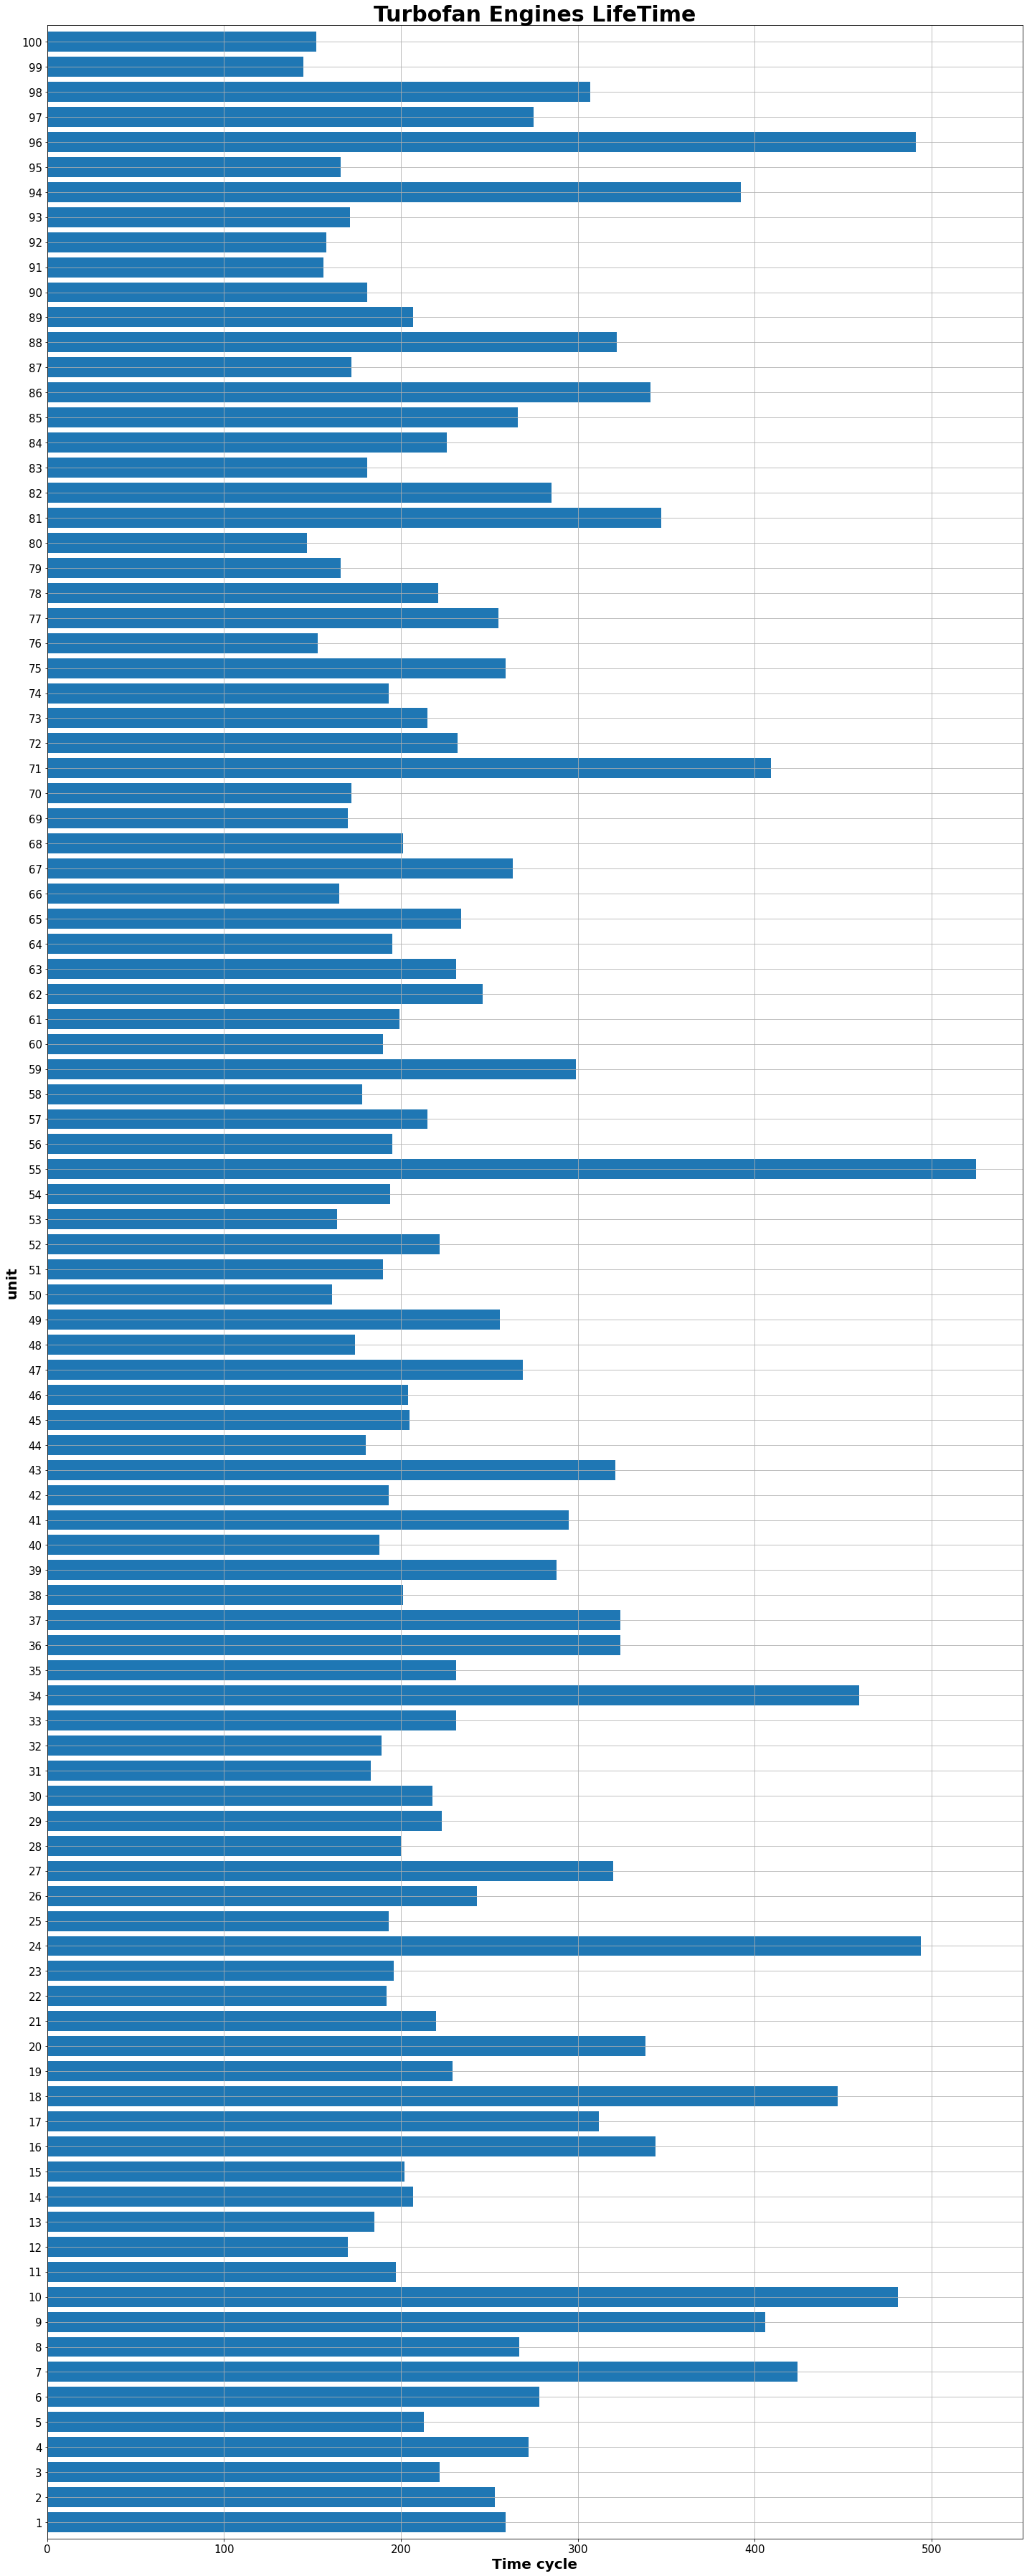

In [20]:
max_time_cycles=train[index_names].groupby('unit_number').max()
plt.figure(figsize=(20,50))
ax=max_time_cycles['time_cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 6.800000000000011, 'max time cycle')

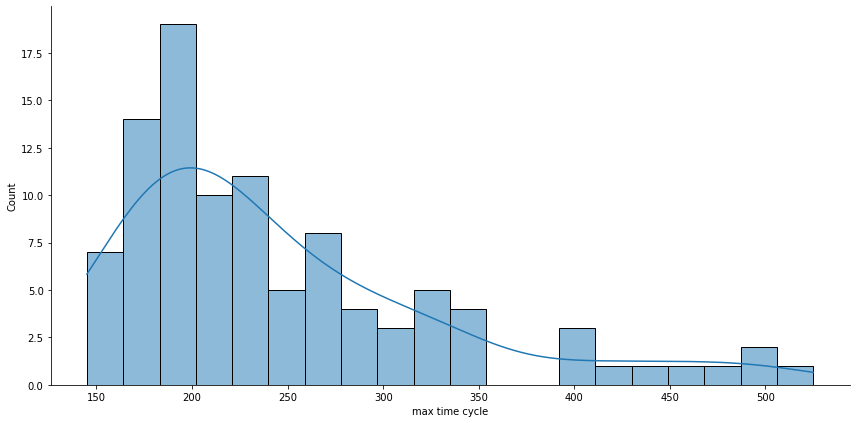

In [21]:
#Distribution of maximum time cycles
sns.displot(max_time_cycles['time_cycles'],kde=True,bins=20,height=6,aspect=2)
plt.xlabel('max time cycle')

In [22]:
def add_RUL_column(df):
    train_grouped_by_unit = df.groupby(by='unit_number') 
    max_time_cycles = train_grouped_by_unit['time_cycles'].max() 
    merged = df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
    merged = merged.drop("max_time_cycle", axis=1) 
    return merged

In [23]:
train = add_RUL_column(train)

In [24]:
train[['unit_number','RUL']]

,unit_number,RUL
0,1,258
1,1,257
2,1,256
3,1,255
4,1,254
...,...,...
24715,100,4
24716,100,3
24717,100,2
24718,100,1


In [25]:
#Rul analysis
maxrul_u = train.groupby('unit_number').max().reset_index()
maxrul_u.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,259,0.0068,0.0005,100.0,518.67,644.02,1606.80,1434.33,14.62,...,2388.28,8157.42,8.5480,0.03,398,2388,100.0,39.20,23.5448,258
1,2,253,0.0058,0.0005,100.0,518.67,643.63,1607.18,1431.57,14.62,...,2388.57,8190.81,8.4290,0.03,397,2388,100.0,39.76,23.9159,252
2,3,222,0.0068,0.0006,100.0,518.67,644.23,1606.01,1432.49,14.62,...,2388.28,8164.52,8.5492,0.03,398,2388,100.0,39.22,23.5158,221
3,4,272,0.0059,0.0005,100.0,518.67,644.47,1606.59,1434.11,14.62,...,2388.34,8137.71,8.5699,0.03,397,2388,100.0,39.08,23.4041,271
4,5,213,0.0051,0.0005,100.0,518.67,644.45,1608.57,1439.48,14.62,...,2388.27,8183.86,8.5418,0.03,398,2388,100.0,39.10,23.4300,212


<Axes: >

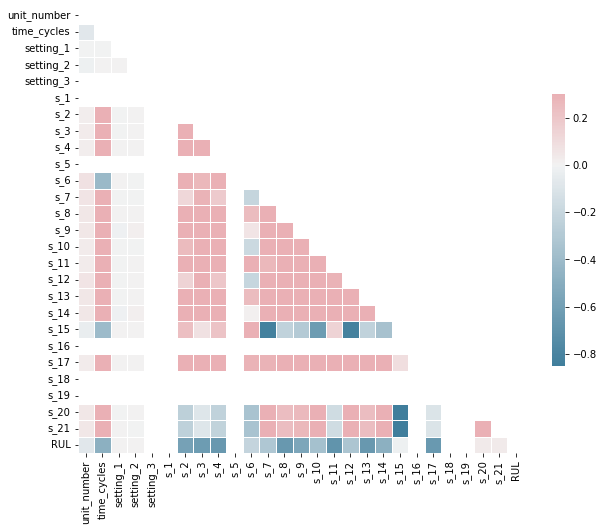

In [26]:
# Compute the correlation matrix
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
Sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
i=1
for x in dict_list :
    Sensor_dictionary['s_'+str(i)]=x
    i+=1
Sensor_dictionary

{'s_1': '(Fan inlet temperature) (◦R)',
 's_2': '(LPC outlet temperature) (◦R)',
 's_3': '(HPC outlet temperature) (◦R)',
 's_4': '(LPT outlet temperature) (◦R)',
 's_5': '(Fan inlet Pressure) (psia)',
 's_6': '(bypass-duct pressure) (psia)',
 's_7': '(HPC outlet pressure) (psia)',
 's_8': '(Physical fan speed) (rpm)',
 's_9': '(Physical core speed) (rpm)',
 's_10': '(Engine pressure ratio(P50/P2)',
 's_11': '(HPC outlet Static pressure) (psia)',
 's_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 's_13': '(Corrected fan speed) (rpm)',
 's_14': '(Corrected core speed) (rpm)',
 's_15': '(Bypass Ratio) ',
 's_16': '(Burner fuel-air ratio)',
 's_17': '(Bleed Enthalpy)',
 's_18': '(Required fan speed)',
 's_19': '(Required fan conversion speed)',
 's_20': '(High-pressure turbines Cool air flow)',
 's_21': '(Low-pressure turbines Cool air flow)'}

In [28]:
def plot_signal(df, Sensor_dic, signal_name):
    plt.figure(figsize=(13,5))
    for i in df['unit_number'].unique():
        if (i % 10 == 0):   #For a better visualisation, we plot the sensors signals of 20 units only
            plt.plot('RUL', signal_name, data=df[df['unit_number']==i].rolling(10).mean())

    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(Sensor_dic[signal_name])
    plt.xlabel('Remaining Useful Life')
    plt.show()

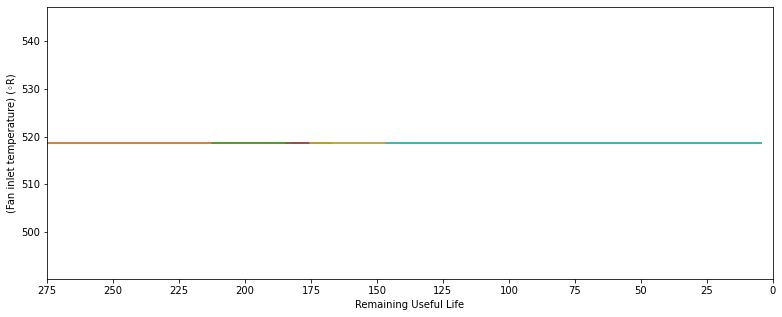

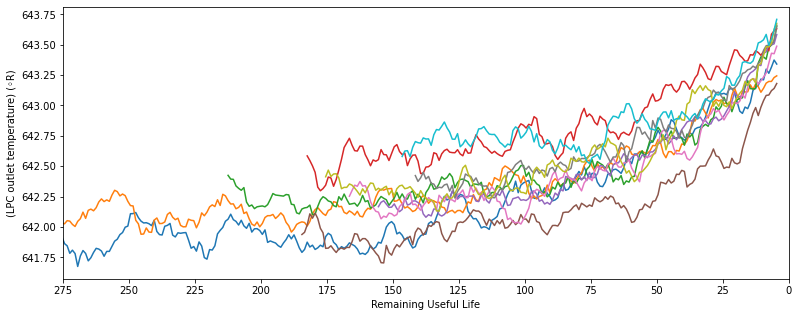

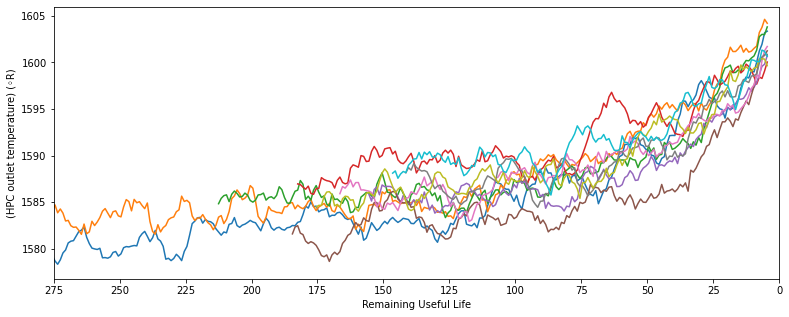

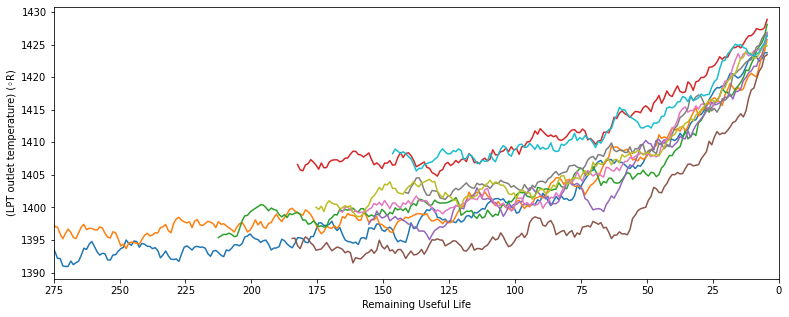

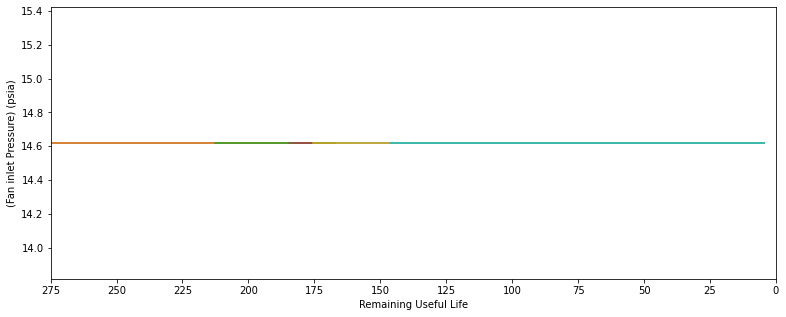

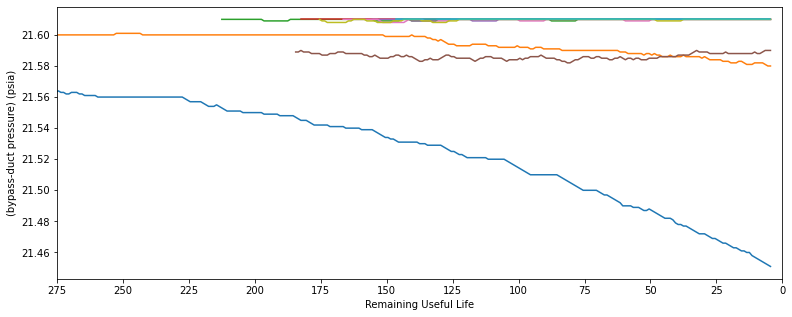

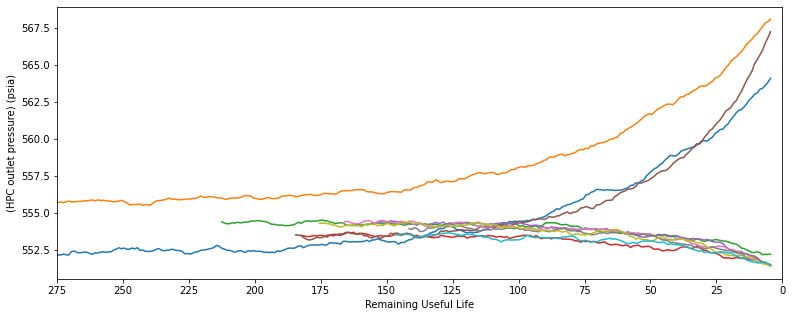

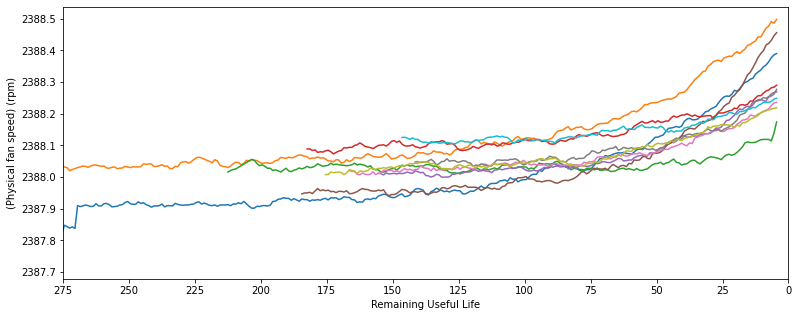

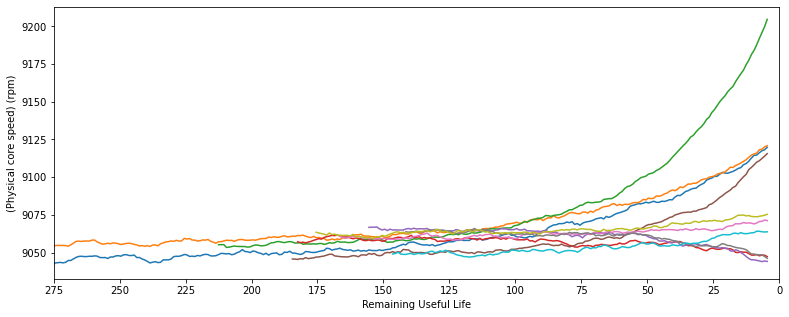

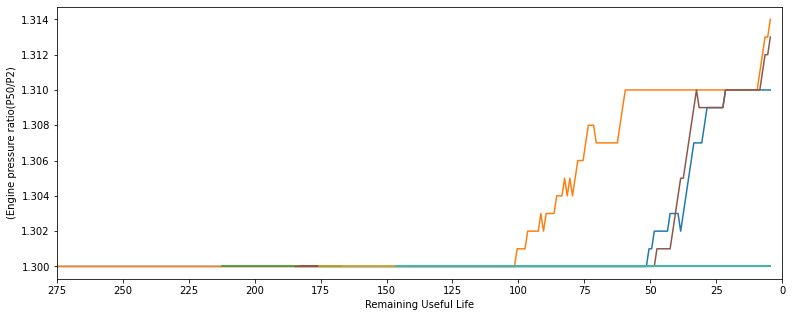

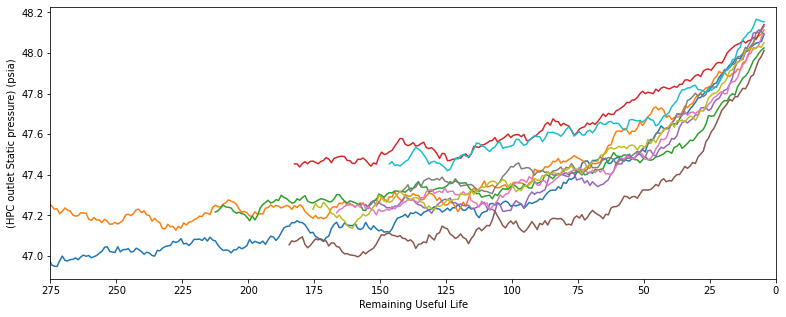

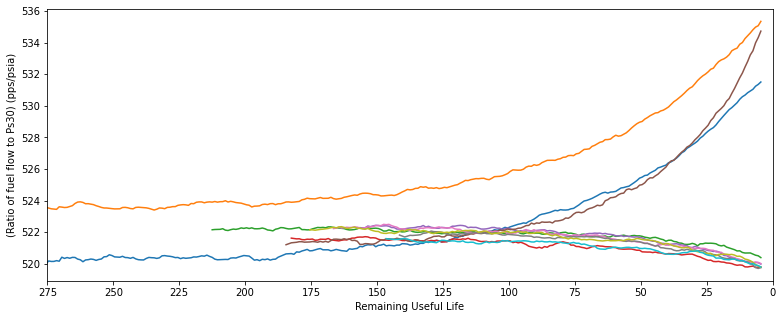

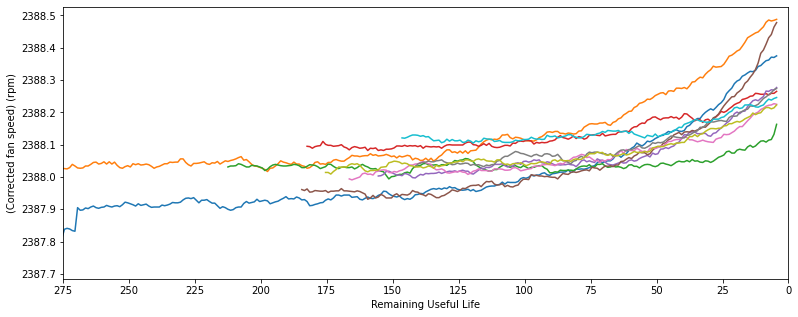

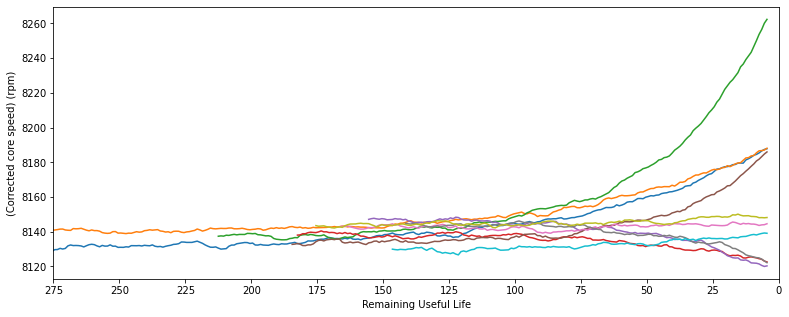

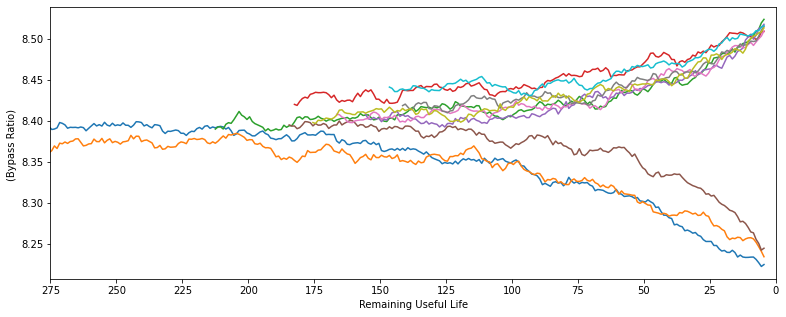

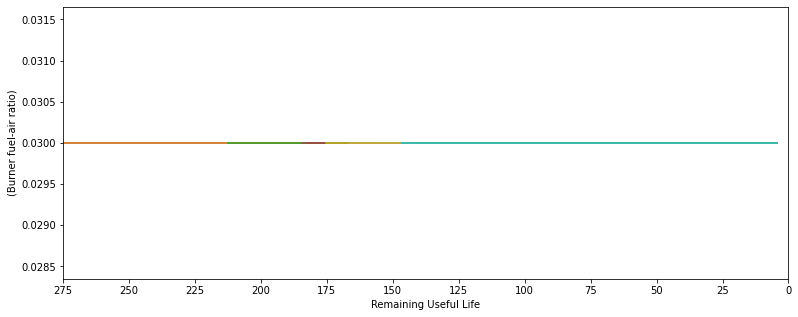

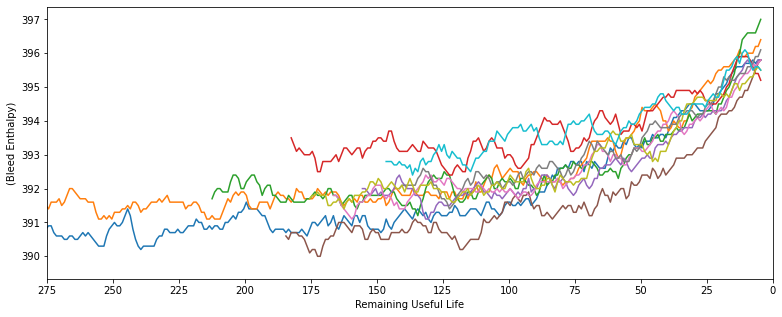

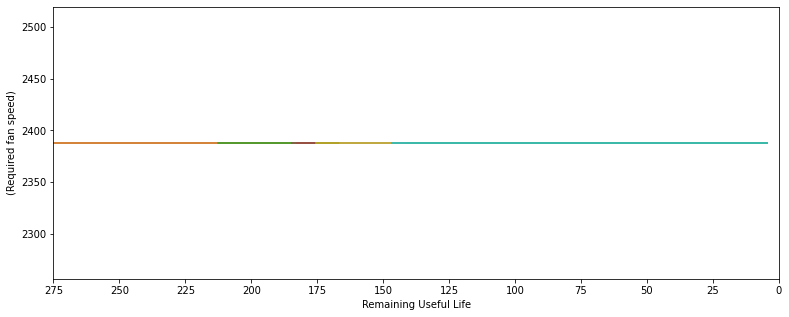

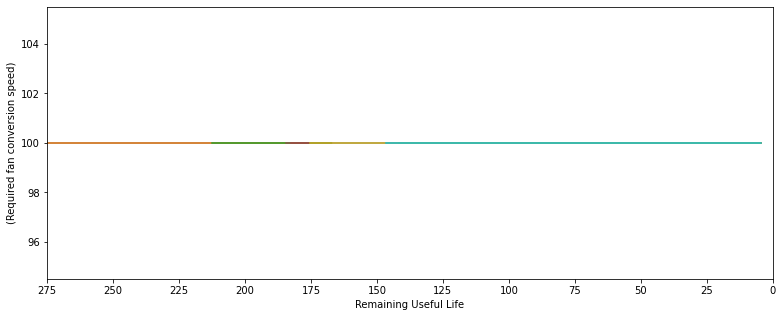

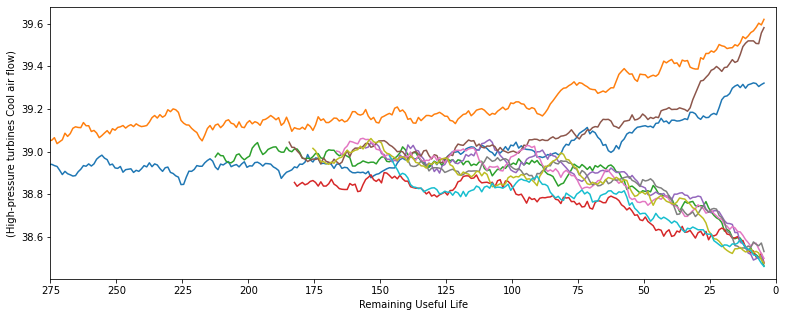

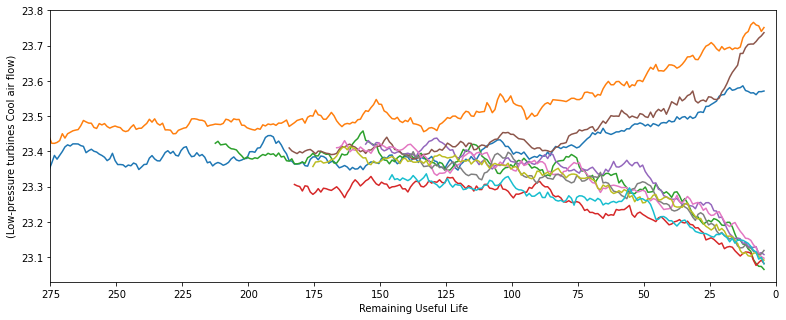

In [29]:
for i in range(1,22):
    try:
        plot_signal(train, Sensor_dictionary,'s_'+str(i))
    except:
        pass

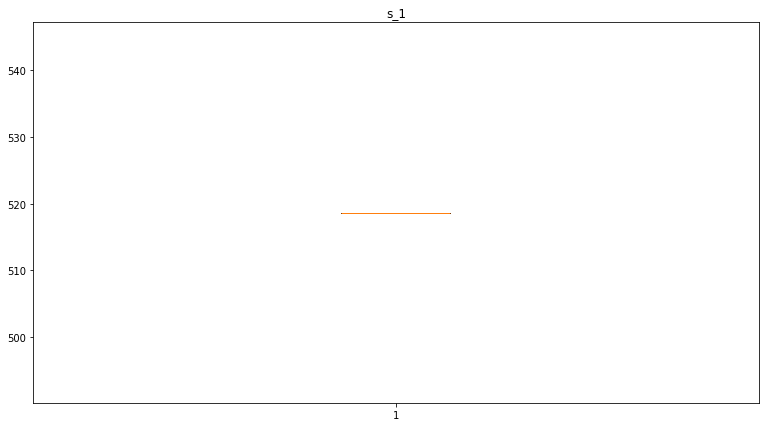

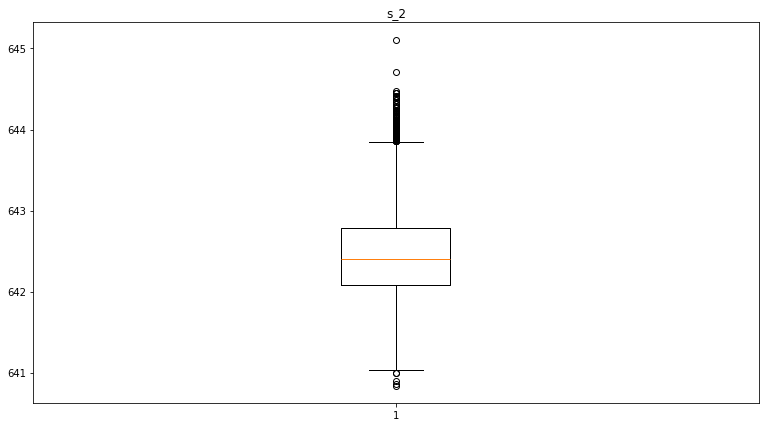

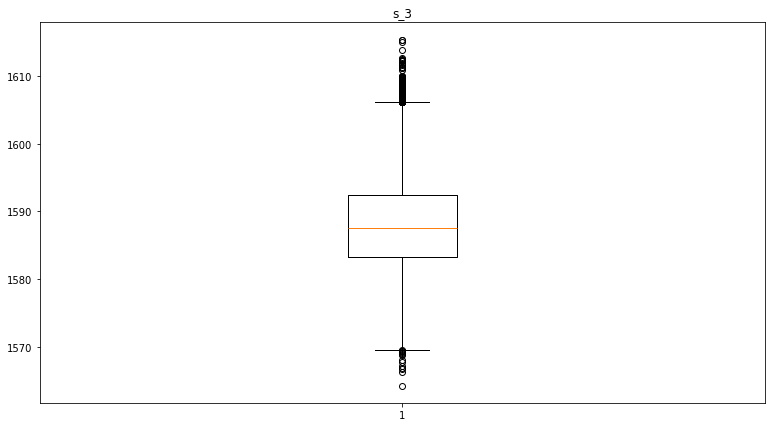

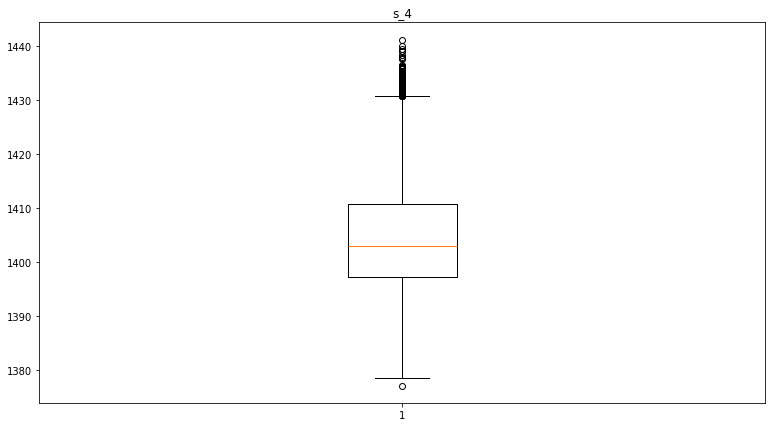

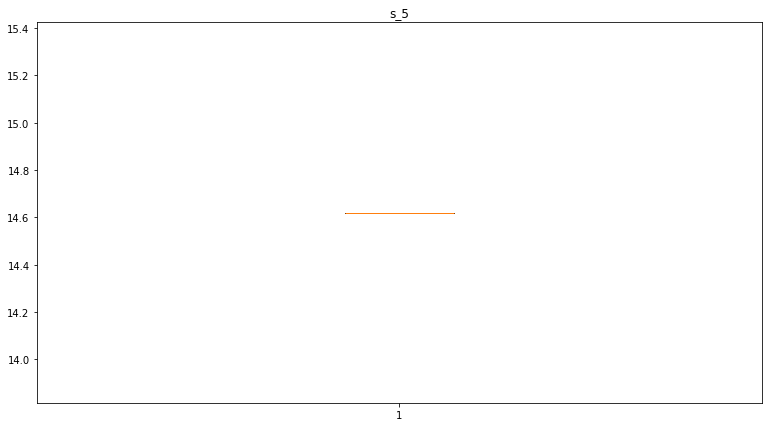

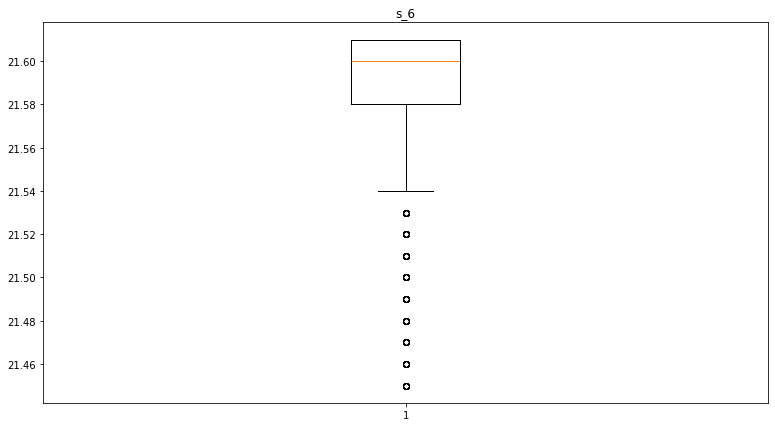

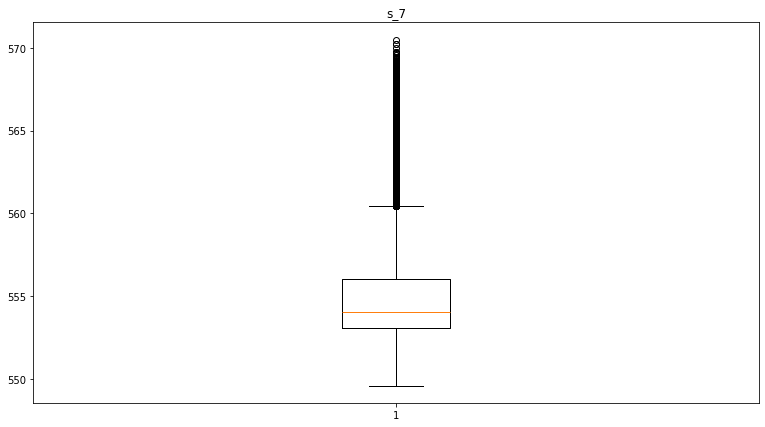

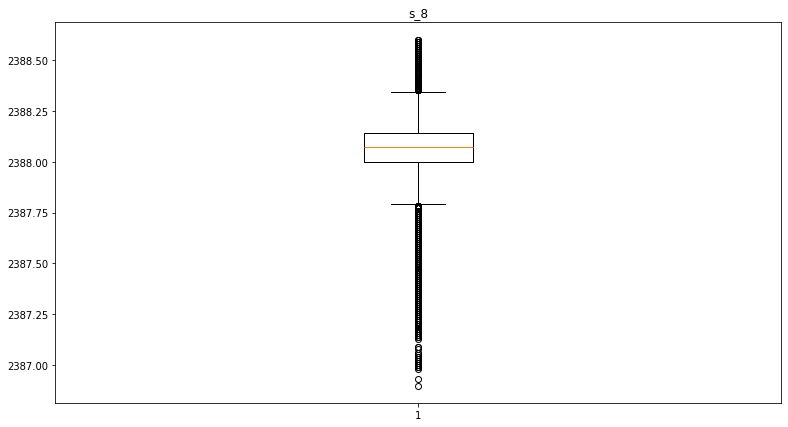

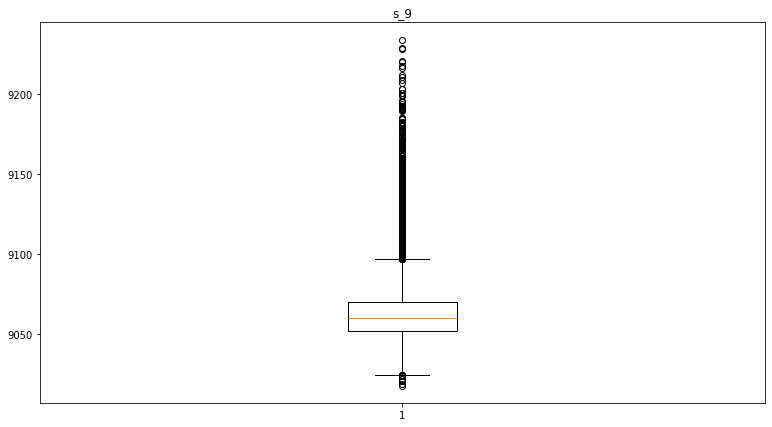

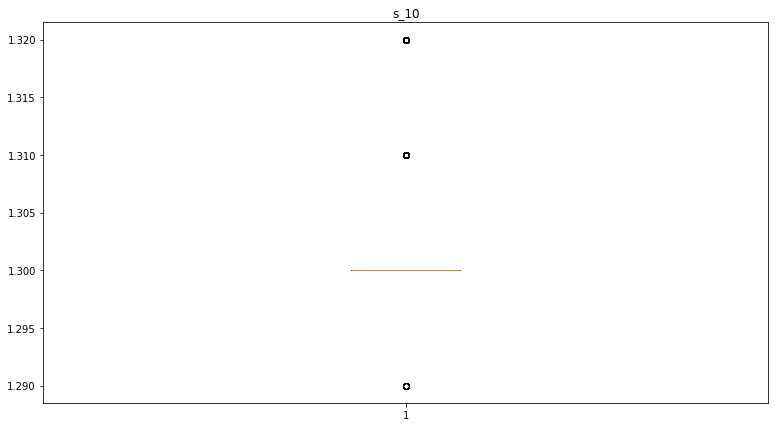

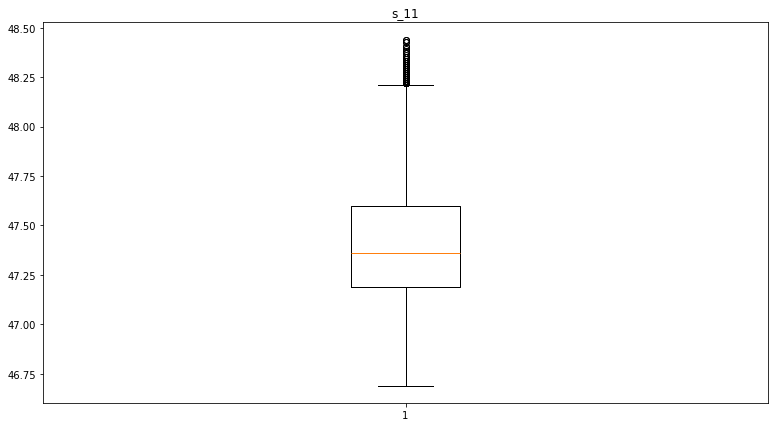

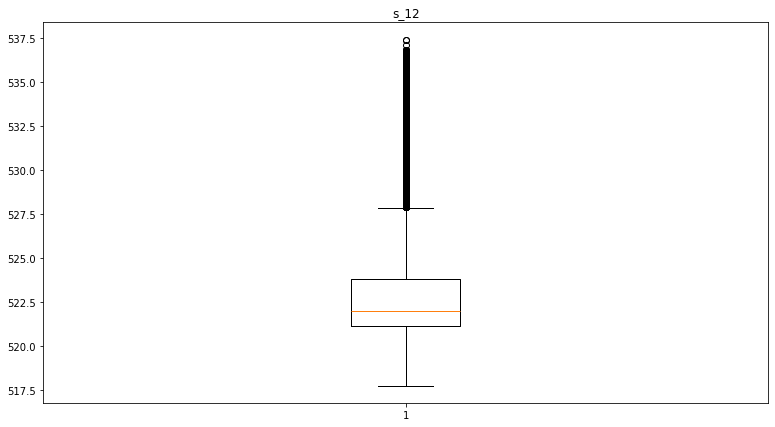

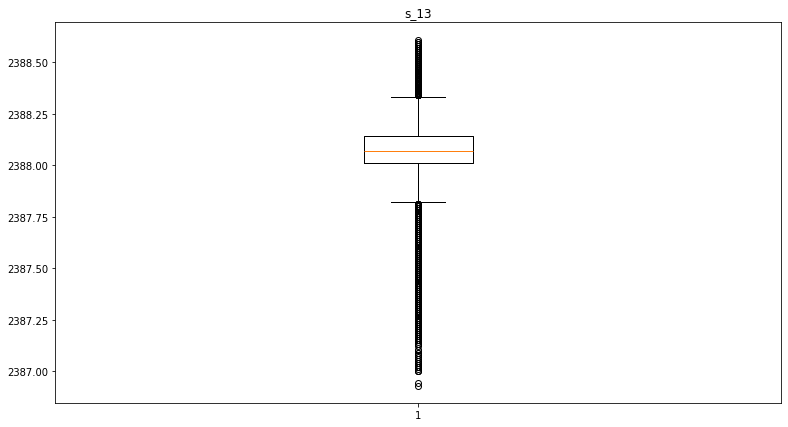

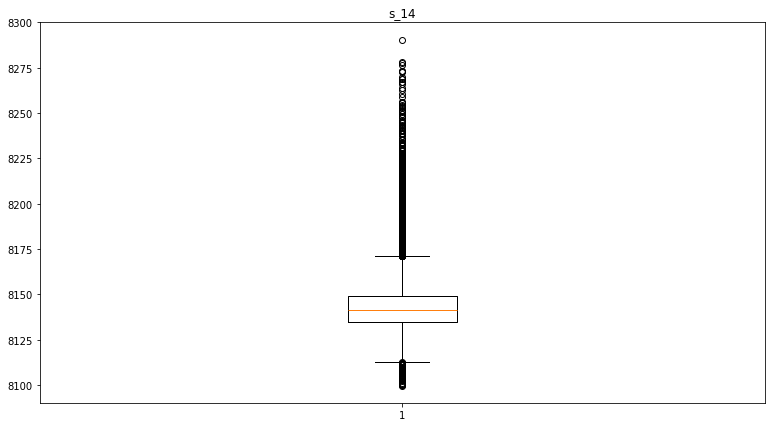

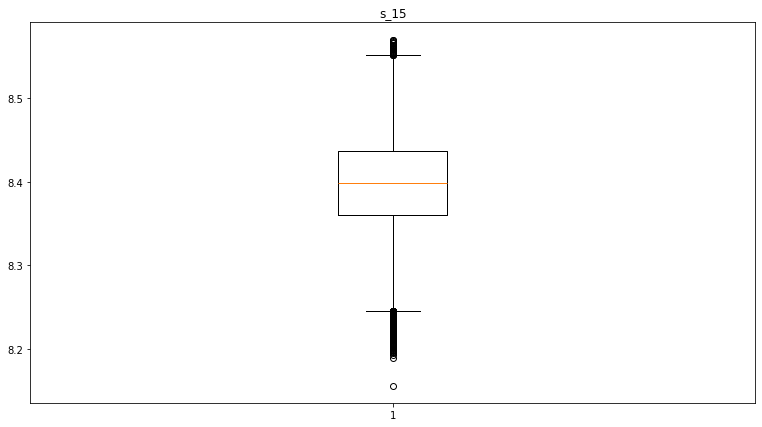

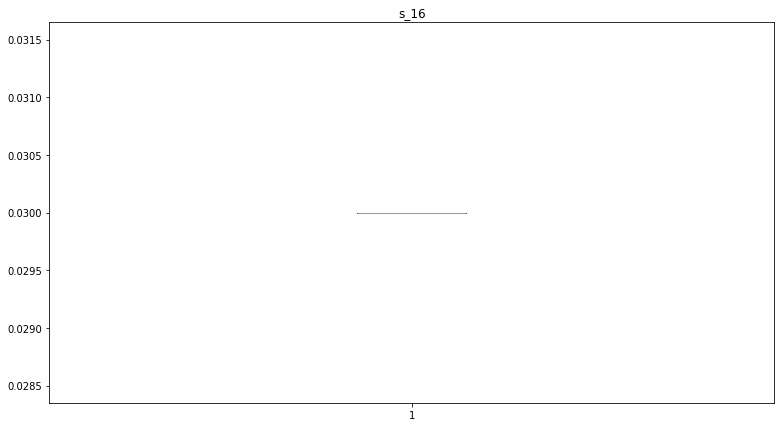

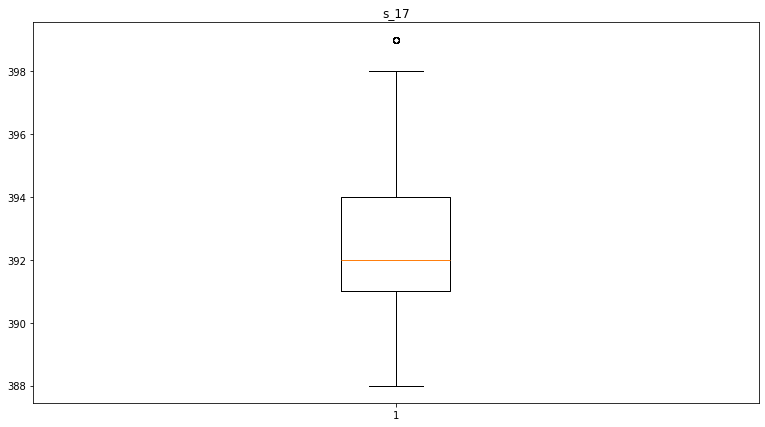

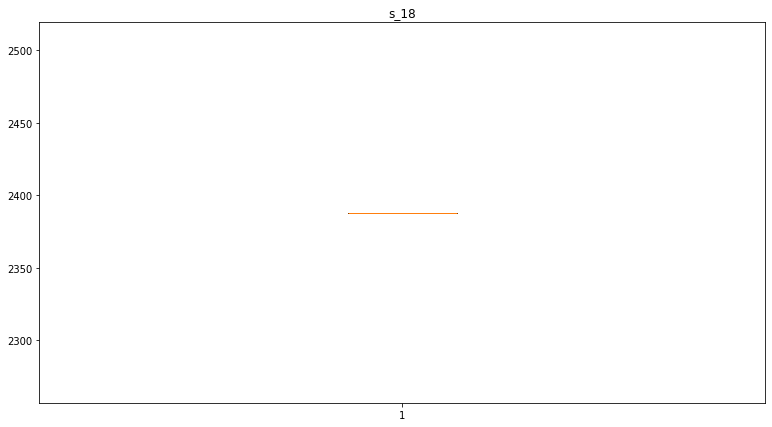

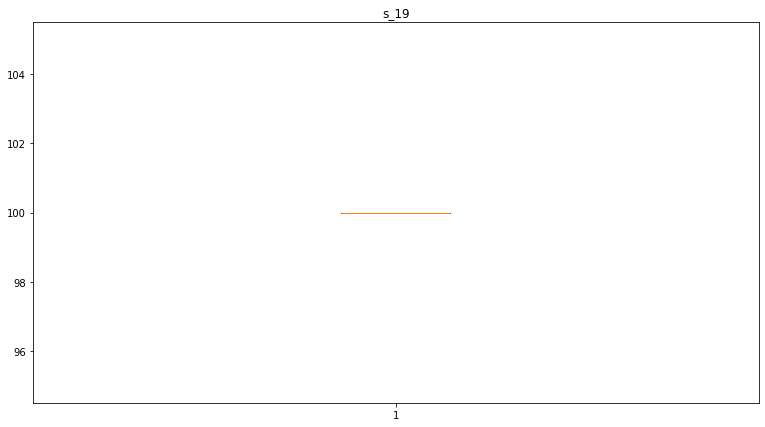

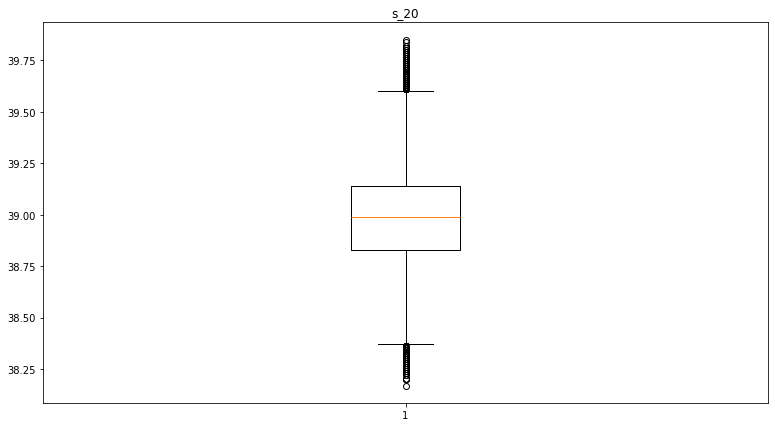

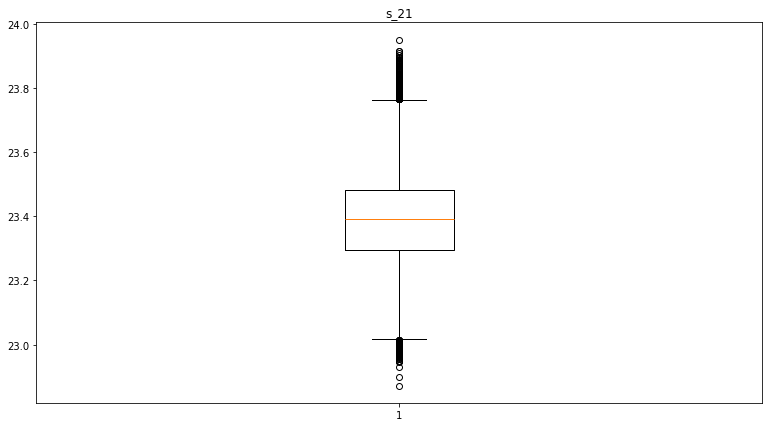

In [30]:
for x in sensor_names:
    plt.figure(figsize=(13,7))
    plt.boxplot(train[x])
    plt.title(x)
    plt.show()

In [31]:
train.loc[:,'s_1':].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,24720.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,24720.0,642.457858,5.230311e-01,640.8400,642.0800,642.4000,642.7900,645.1100
s_3,24720.0,1588.079175,6.810418e+00,1564.3000,1583.2800,1587.5200,1592.4125,1615.3900
s_4,24720.0,1404.471212,9.773178e+00,1377.0600,1397.1875,1402.9100,1410.6000,1441.1600
s_5,24720.0,14.620000,3.552786e-15,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,24720.0,21.595841,1.811600e-02,21.4500,21.5800,21.6000,21.6100,21.6100
s_7,24720.0,555.143808,3.437343e+00,549.6100,553.1100,554.0500,556.0400,570.4900
s_8,24720.0,2388.071555,1.582849e-01,2386.9000,2388.0000,2388.0700,2388.1400,2388.6000
s_9,24720.0,9064.110809,1.998029e+01,9017.9800,9051.9200,9060.0100,9070.0925,9234.3500
s_10,24720.0,1.301232,3.484849e-03,1.2900,1.3000,1.3000,1.3000,1.3200


In [32]:
from sklearn.model_selection import train_test_split
drop_labels = index_names+setting_names
X_train=train.drop(columns=drop_labels).copy()
X_train, X_test, y_train, y_test=train_test_split(X_train,X_train['RUL'], test_size=0.3, random_state=42)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Droping the target variable
X_train.drop(columns=['RUL'], inplace=True)
X_test.drop(columns=['RUL'], inplace=True)
#Scaling X_train and X_test
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.fit_transform(X_test)
#Conserve only the last occurence of each unit to match the length of y_valid
X_valid = valid.groupby('unit_number').last().reset_index().drop(columns=drop_labels)
#scaling X_valid
X_valid_s=scaler.fit_transform(X_valid)

In [34]:
print(X_valid_s.shape)
print(y_valid.shape)

(100, 21)
(100, 1)


array([[<Axes: title={'center': 's_2'}>, <Axes: title={'center': 's_3'}>,
        <Axes: title={'center': 's_4'}>, <Axes: title={'center': 's_7'}>],
       [<Axes: title={'center': 's_8'}>, <Axes: title={'center': 's_9'}>,
        <Axes: title={'center': 's_11'}>,
        <Axes: title={'center': 's_12'}>],
       [<Axes: title={'center': 's_13'}>,
        <Axes: title={'center': 's_14'}>,
        <Axes: title={'center': 's_15'}>,
        <Axes: title={'center': 's_17'}>],
       [<Axes: title={'center': 's_20'}>,
        <Axes: title={'center': 's_21'}>, <Axes: >, <Axes: >]],
      dtype=object)

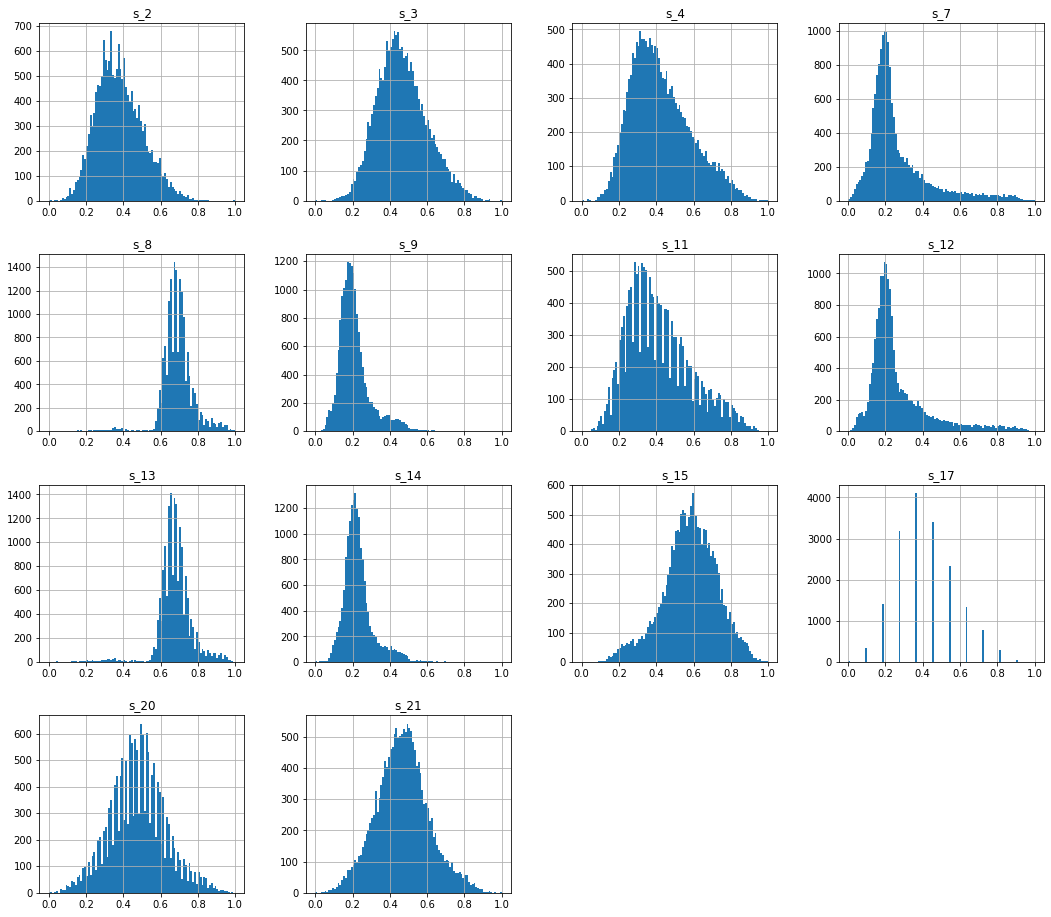

In [35]:
sensor_names=['s_{}'.format(i) for i in range(1,22) if i not in [1,5,6,10,16,18,19]]
pd.DataFrame(X_train_s,columns=['s_{}'.format(i) for i in range(1,22)])[sensor_names].hist(bins=100, figsize=(18,16))

In [36]:
class Linear_Regression() :
    def __init__( self, lr=0.01, iterations=150 ) :    
        self.lr = lr
        self.iterations = iterations     
    def fit( self, X, Y ) :
        self.l, self.p = X.shape
        # weight initializer
        self.W = np.zeros( self.p )
        self.b = 0
        self.X = X
        self.Y = Y
        # gradientlearning      
        for i in range( self.iterations ) :  
            self.weight_updater()
        return self
         
    def weight_updater( self ) :
        Y_pred = self.predict( self.X )  
        #  gradients  
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.l
        db = - 2 * np.sum( self.Y - Y_pred ) / self.l
        # new weights assigned
        self.b = self.b - self.lr * db
        self.W = self.W - self.lr * dW
        return self
          
    def predict( self, X ) :
          # Y_pr=X.W+b
        return X.dot( self.W ) + self.b


In [37]:
from sklearn.svm import SVR
import tensorflow as tf
regressor = SVR(kernel='rbf')

In [38]:
rf = RandomForestRegressor(max_features="sqrt", random_state=42)

In [39]:
#R2 score & RMSE & MAER
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [40]:
#plot real data and the predicted one to make some comparison
def plot_predActual(y_test, y_test_hat):
  
    indices = np.arange(len(y_test_hat))
    wth= 0.6
    plt.figure(figsize=(70,30))
    true_values = [int(x) for x in y_test.values]
    predicted_values = list(y_test_hat)

    plt.bar(indices, true_values, width=wth,color='b', label='True RUL')
    plt.bar([i for i in indices], predicted_values, width=0.5*wth, color='r', alpha=0.7, label='Predicted RUL')

    plt.legend(prop={'size': 40})
    plt.tick_params(labelsize=40)

    plt.show()

In [41]:
lr=Linear_Regression() #Instantiation
lr.fit(X=X_train_s, Y=y_train) #Fitting 

y_lr_train = lr.predict(X_train_s) #Prediction on train data
evaluate(y_train,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_s)  #Prediction on test data
evaluate(y_test, y_lr_test, label='test')

y_lr_valid= lr.predict(X_valid_s) #Prediction on validation data
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:97.04527768058038, R2:0.034247322804832336
test set RMSE:97.41702579318216, R2:0.03282592924866379
valid set RMSE:57.232082056309466, R2:-0.9114821452248412


In [42]:
regressor.fit(X_train_s, y_train) # fitting

y_svr_train = regressor.predict(X_train_s) #Prediction on train data
evaluate(y_train,y_svr_train, label='train')

y_svr_test = regressor.predict(X_test_s) #Prediction on test data
evaluate(y_test, y_svr_test, label='test')

y_svr_valid= lr.predict(X_valid_s)  #Prediction on validation data
evaluate(y_valid, y_svr_valid, label='valid')

train set RMSE:63.28077663116842, R2:0.5893605139363556
test set RMSE:62.679423980398255, R2:0.5996084476406353
valid set RMSE:57.232082056309466, R2:-0.9114821452248412


In [43]:
# gridsearch goes here
rf.fit(X_train_s, y_train)
# predict and evaluate
y_rf_train = rf.predict(X_train_s)
evaluate(y_train,y_rf_train, label='train')

y_rf_test = rf.predict(X_test_s)
evaluate(y_test, y_rf_test, label='test')

y_rf_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_rf_valid, label='valid')

train set RMSE:21.238334541787324, R2:0.9537450706943889
test set RMSE:56.546181791781784, R2:0.6741321743788609
valid set RMSE:36.257938882402016, R2:0.23281981020514986


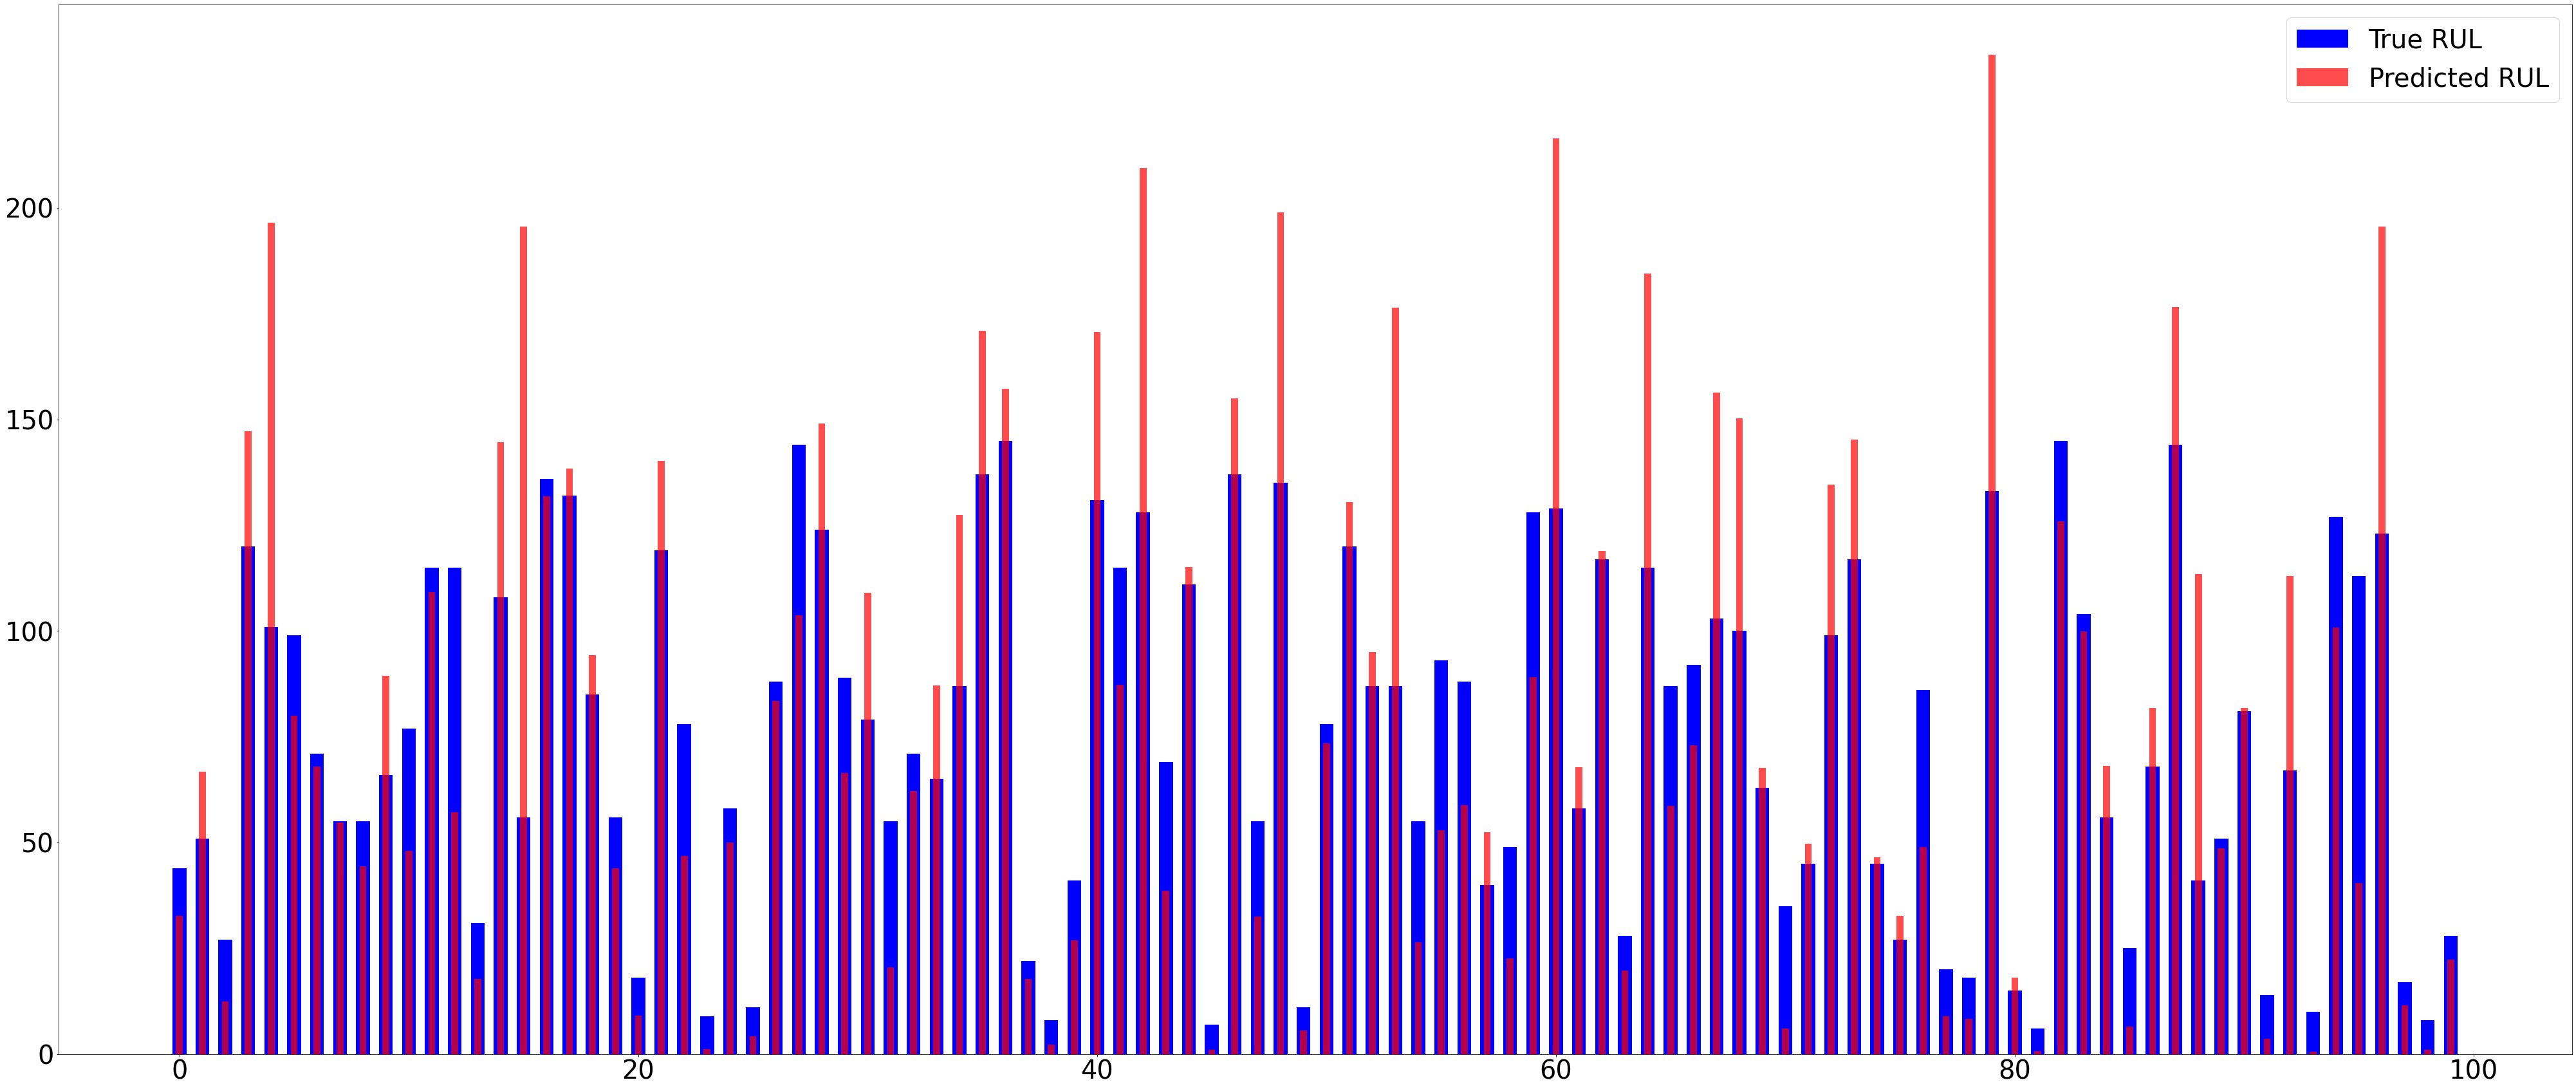

In [44]:
plot_predActual(y_valid, y_rf_valid)

In [45]:
print('maximum of y_train : ',y_train.max())
print('maximum of y_test : ',y_test.max())
print('maximum of y_valid : ',y_valid.max())

maximum of y_train :  524
maximum of y_test :  518
maximum of y_valid :  RUL    145
dtype: int64


(array([1551., 1551., 1541., 1230.,  643.,  386.,  235.,  173.,   80.,
          26.]),
 array([  0. ,  51.8, 103.6, 155.4, 207.2, 259. , 310.8, 362.6, 414.4,
        466.2, 518. ]),
 <BarContainer object of 10 artists>)

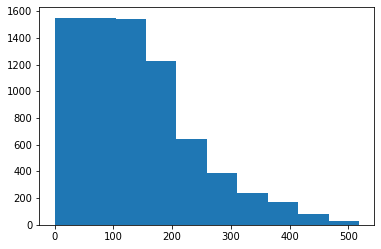

In [46]:
plt.hist(y_test)

In [47]:
drop_labels2=['s_1', 's_5','s_6','s_10',  's_16', 's_18', 's_19']
X_train_2=X_train.drop(columns=drop_labels2, axis=1) # drop the constant columns from the train dataset
X_test_2=X_test.drop(columns=drop_labels2, axis=1)  # drop the constant columns from the test dataset
X_train_2_s=scaler.fit_transform(X_train_2) #scaling X_train_2
X_test_2_s=scaler.fit_transform(X_test_2) #scaling X_test_2
y_train_clip=y_train.clip(upper=195)  #Clipping y_train to have 195 as the maximum value 
X_valid_2=X_valid.drop(columns=drop_labels2, axis=1)  # drop the constant columns from the validation dataset
X_valid_2_s=scaler.fit_transform(X_valid_2) #scaling X_valid_2

In [48]:
lr=Linear_Regression()
lr.fit(X=X_train_2_s, Y=y_train_clip)

y_lr_train = lr.predict(X_train_2_s)
evaluate(y_train_clip,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_2_s)
evaluate(y_test, y_lr_test, label='test')

y_lr_valid = lr.predict(X_valid_2_s)
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:65.4705277435061, R2:-0.03234544649521198
test set RMSE:103.73034231337104, R2:-0.09659569037965632
valid set RMSE:55.80647570186054, R2:-0.8174411135160033


In [49]:
regressor.fit(X_train_2_s, y_train)

y_svr_train = regressor.predict(X_train_2_s)
evaluate(y_train_clip,y_svr_train, label='train')

y_svr_test = regressor.predict(X_test_2_s)
evaluate(y_test, y_svr_test, label='test')

y_svr_valid = regressor.predict(X_valid_2_s)
evaluate(y_valid, y_svr_valid, label='valid')

train set RMSE:38.78316418671187, R2:0.637740452133729
test set RMSE:63.18667680043348, R2:0.5931016371064294
valid set RMSE:35.99721295109095, R2:0.243813518269289


In [50]:
rf.fit(X_train_2_s, y_train_clip)
# predict and evaluate
y_rf_train = rf.predict(X_train_2_s)
evaluate(y_train_clip,y_rf_train, label='train')

y_rf_test = rf.predict(X_test_2_s)
evaluate(y_test, y_rf_test, label='test')

y_rf_valid = rf.predict(X_valid_2_s)
evaluate(y_valid, y_rf_valid, label='valid')

train set RMSE:11.94435406186349, R2:0.9656395612908538
test set RMSE:71.20785687235146, R2:0.48323779485288787
valid set RMSE:25.726608929277873, R2:0.613760892872399


In [51]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=110, learning_rate=0.02, gamma=0, subsample=0.8,colsample_bytree=0.5, max_depth=3)
xgb.fit(X_train_2_s, y_train_clip)


y_xgb_train = xgb.predict(X_train_2_s)
evaluate(y_train_clip,y_xgb_train, label='train')

y_xgb_test = xgb.predict(X_test_2_s)
evaluate(y_test, y_xgb_test, label='test')

y_xgb_valid = xgb.predict(X_valid_2_s)
evaluate(y_valid, y_xgb_valid, label='valid')

train set RMSE:33.540267364463574, R2:0.7290641940995615
test set RMSE:73.61964622289095, R2:0.44763981695767974
valid set RMSE:22.520169138941178, R2:0.7040390240704595


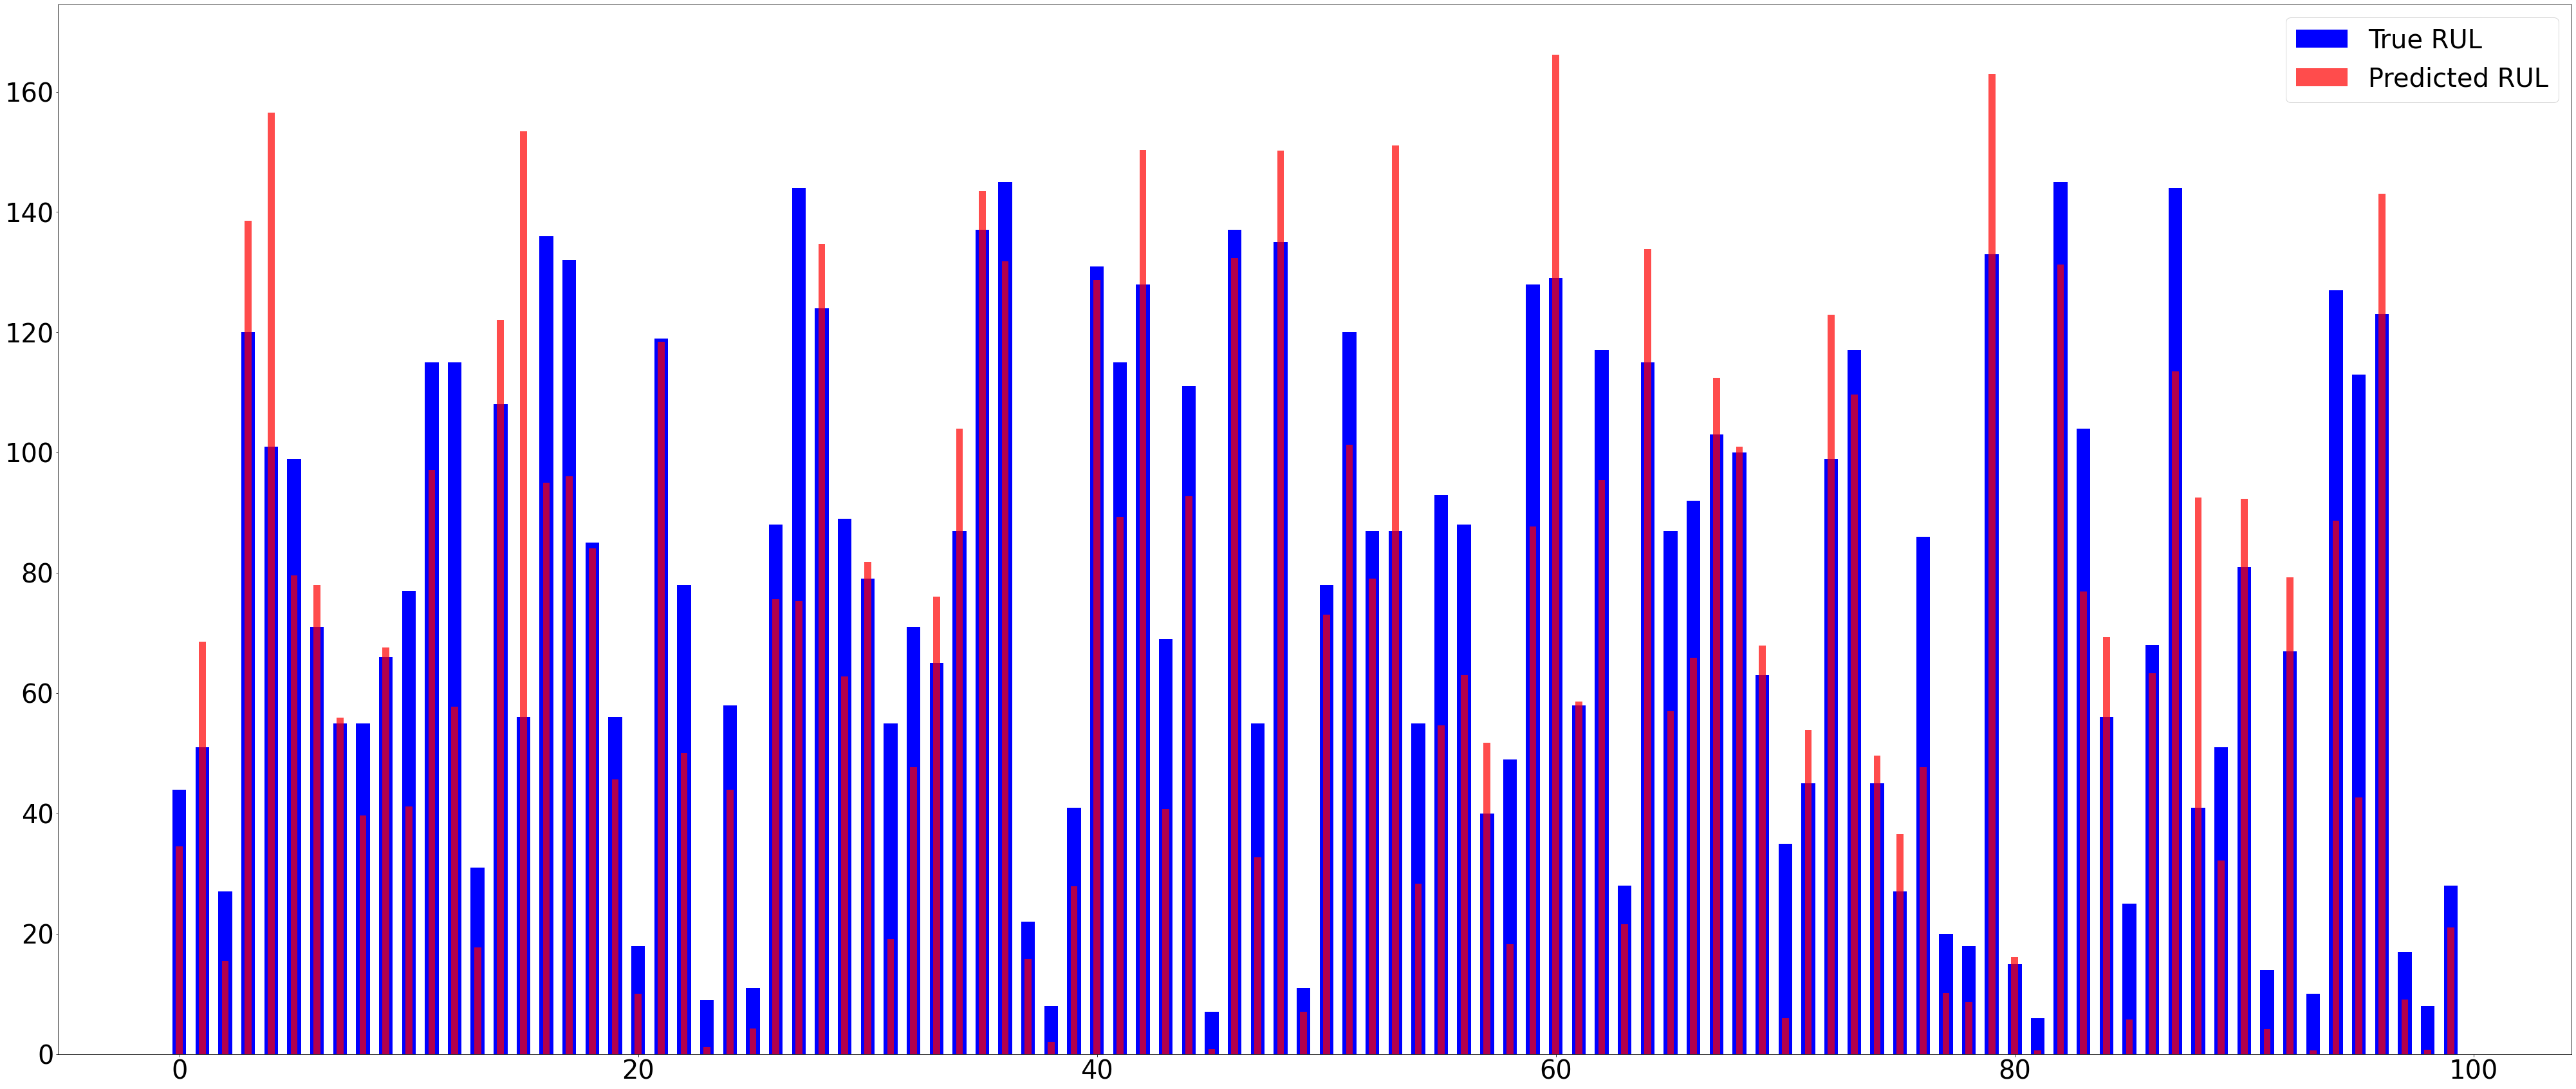

In [52]:
plot_predActual(y_valid, y_rf_valid)

In [53]:
df=train.copy()
for x in X_train_2.columns:
    df[x+'_rm']=0

    
df.columns

Index(['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3',
       's_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10',
       's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19',
       's_20', 's_21', 'RUL', 's_2_rm', 's_3_rm', 's_4_rm', 's_7_rm', 's_8_rm',
       's_9_rm', 's_11_rm', 's_12_rm', 's_13_rm', 's_14_rm', 's_15_rm',
       's_17_rm', 's_20_rm', 's_21_rm'],
      dtype='object')

In [54]:
drop_labels2=['s_1', 's_5','s_6','s_10',  's_16', 's_18', 's_19']
df=df.drop(columns=setting_names+drop_labels2+['RUL'], axis=1)

X_valid_3=valid.drop(columns=index_names+setting_names+drop_labels2, axis=1)

In [55]:
def update_rolling_mean(data, mask):
    for x, group in mask.groupby("unit_number"):
        for x in X_train_2.columns:
            data.loc[group.index[10:], x+"_rm"] = data.loc[group.index, x].rolling(10).mean()[10:]
            data.loc[group.index[:10], x+"_rm"] = data.loc[group.index[:10], x]

update_rolling_mean(df, df)
update_rolling_mean(X_valid_3, valid)

X_valid_3=X_valid_3.fillna(0)

In [56]:
df.iloc[-1,-14:]=df.iloc[-2,-14:]
X_valid_3.iloc[-1,-14:]=X_valid_3.iloc[-2,-14:]

In [57]:
train_tm=df

In [58]:
train_tm=train_tm.drop(columns=index_names, axis=1)

In [59]:
X_train_tm, X_test_tm, y_train_tm, y_test_tm=train_test_split(train_tm,train['RUL'].clip(upper=195), test_size=0.35, random_state=42)
X_train_tm_s=scaler.fit_transform(X_train_tm)
X_test_tm_s=scaler.fit_transform(X_test_tm)
X_val3=pd.concat([valid['unit_number'],X_valid_3],axis=1)
X_valid3 = X_val3.groupby('unit_number').last().reset_index().drop(columns=['unit_number'])
X_valid_s=scaler.fit_transform(X_valid3)

In [60]:
lr=Linear_Regression()
lr.fit(X_train_tm_s, y_train_tm)

y_lr_train = lr.predict(X_train_tm_s)
evaluate(y_train_tm,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_tm_s)
evaluate(y_test_tm, y_lr_test, label='test')

y_lr_valid = lr.predict(X_valid_s)
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:59.410094312772635, R2:0.15281647107400942
test set RMSE:59.20606157123085, R2:0.15231573282315813
valid set RMSE:43.98424611994525, R2:-0.12897795068102247


In [61]:
regressor.fit(X_train_tm_s, y_train_tm)

y_svr_train = regressor.predict(X_train_tm_s)
evaluate(y_train_tm,y_svr_train, label='train')

y_svr_test = regressor.predict(X_test_tm_s)
evaluate(y_test_tm, y_svr_test, label='test')

y_svr_valid = regressor.predict(X_valid_s)
evaluate(y_valid, y_svr_valid, label='valid')

train set RMSE:32.975651086326444, R2:0.7389980341938217
test set RMSE:32.44525087375538, R2:0.7454318590504347
valid set RMSE:24.90110913521815, R2:0.6381500323272833


In [62]:
rf = RandomForestRegressor(max_features="sqrt", random_state=42)
rf.fit(X_train_tm_s, y_train_tm)
# predict and evaluate
y_hat_train = rf.predict(X_train_tm_s)
evaluate(y_train_tm,y_hat_train, label='train')
y_hat_test = rf.predict(X_test_tm_s)
evaluate(y_test_tm, y_hat_test, label='test')
y_hat_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:9.634362389940087, R2:0.9777206264154606
test set RMSE:30.555369364400004, R2:0.7742244786082572
valid set RMSE:30.36489435186627, R2:0.4619350488119265


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor()
param_grid = { 
    'n_estimators': [50,90,120],
    'max_depth' : [8,9,10],
}

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=3)

grid.fit(X_train_tm_s, y_train_tm)

print(grid.best_score_ , grid.best_params_)
#max_features=5,

0.8216818832707083 {'max_depth': 10, 'n_estimators': 120}


In [64]:
rf=RandomForestRegressor(n_estimators=90,  max_depth=10, n_jobs=-1, random_state=42)
rf.fit(X_train_tm_s, y_train_tm)
# predict and evaluate
y_hat_train = rf.predict(X_train_tm_s)
evaluate(y_train_tm,y_hat_train, label='train')
y_hat_test = rf.predict(X_test_tm_s)
evaluate(y_test_tm, y_hat_test, label='test')
y_hat_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:21.469600233914093, R2:0.8893618422312467
test set RMSE:30.647808698915533, R2:0.7728563322390365
valid set RMSE:36.969518925786616, R2:0.20241173913636745


In [65]:
# Params found using Bayesian Optimisation
xgb = xgboost.XGBRegressor(n_estimators=50, 
                           max_depth=6,
                           learning_rate=0.1,
                           reg_lambda=0.02,
                           gamma=0.4,
                           random_state=42)
xgb.fit(X_train_tm_s, y_train_tm)

# predict and evaluate
y_hat_train = xgb.predict(X_train_tm_s)
evaluate(y_train_tm, y_hat_train, 'train')

y_hat_test = xgb.predict(X_test_tm_s)
evaluate(y_test_tm, y_hat_test)

y_hat_valid = xgb.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:24.226971637560702, R2:0.8591180735310396
test set RMSE:30.666220811037444, R2:0.7725833306044652
valid set RMSE:34.68220619931528, R2:0.29805257263909357


In [66]:
train_tm

,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,...,s_8_rm,s_9_rm,s_11_rm,s_12_rm,s_13_rm,s_14_rm,s_15_rm,s_17_rm,s_20_rm,s_21_rm
0,642.36,1583.23,1396.84,553.97,2387.96,9062.17,47.30,522.31,2388.01,8145.32,...,2387.960,9062.170,47.300,522.310,2388.010,8145.320,8.42460,391.0,39.110,23.35370
1,642.50,1584.69,1396.89,554.55,2388.00,9061.78,47.23,522.42,2388.03,8152.85,...,2388.000,9061.780,47.230,522.420,2388.030,8152.850,8.44030,392.0,38.990,23.44910
2,642.18,1582.35,1405.61,554.43,2388.03,9070.23,47.22,522.03,2388.00,8150.17,...,2388.030,9070.230,47.220,522.030,2388.000,8150.170,8.39010,391.0,38.850,23.36690
3,642.92,1585.61,1392.27,555.21,2388.00,9064.57,47.24,522.49,2388.08,8146.56,...,2388.000,9064.570,47.240,522.490,2388.080,8146.560,8.38780,392.0,38.960,23.29510
4,641.68,1588.63,1397.65,554.74,2388.04,9076.14,47.15,522.58,2388.03,8147.80,...,2388.040,9076.140,47.150,522.580,2388.030,8147.800,8.38690,392.0,39.140,23.45830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,643.78,1596.01,1424.11,551.86,2388.25,9070.82,48.27,519.66,2388.30,8138.08,...,2388.236,9064.163,48.131,519.979,2388.233,8138.135,8.50605,395.7,38.515,23.11986
24716,643.29,1596.38,1429.14,551.86,2388.23,9064.60,48.13,519.91,2388.28,8144.36,...,2388.236,9064.129,48.166,520.010,2388.241,8138.611,8.50967,395.5,38.512,23.11430
24717,643.84,1604.53,1431.41,551.30,2388.25,9063.45,48.18,519.44,2388.24,8135.95,...,2388.239,9063.777,48.163,519.910,2388.238,8139.003,8.50969,395.6,38.496,23.09431
24718,643.94,1597.56,1426.57,550.69,2388.26,9062.22,48.05,520.01,2388.26,8141.24,...,2388.246,9063.643,48.157,519.880,2388.243,8139.267,8.51398,395.6,38.476,23.09942


In [67]:
from sklearn.model_selection import KFold
train_tm_cv=train_tm.copy()
y=train['RUL'].clip(upper=195)
scores_train=[]
scores_test=[]
scores_validation=[]

cv = KFold(n_splits=4, shuffle=True)
for train_index, test_index in cv.split(train_tm) :
    print("Index du train : ", train_index, "\n")
    print("Index de test : ", test_index)
    X_train, X_test, y_train, y_test = train_tm.iloc[train_index,:], train_tm.iloc[test_index,:],y[train_index], y[test_index]
    regressor.fit(scaler.fit_transform(X_train), y_train)
    y_hat_train = regressor.predict(scaler.fit_transform(X_train))
    evaluate(y_train,y_hat_train, label='train')
    y_hat_test = regressor.predict(scaler.fit_transform(X_test))
    evaluate(y_test, y_hat_test, label='test')
    y_hat_valid = regressor.predict(scaler.fit_transform(X_valid3))
    evaluate(y_valid, y_hat_valid, label='valid')

Index du train :  [    0     1     2 ... 24717 24718 24719] 

Index de test :  [    4     6     8 ... 24708 24713 24714]
train set RMSE:32.79994401459804, R2:0.7398136326104484
test set RMSE:32.49628342423518, R2:0.7495725293096258
valid set RMSE:25.197630202236365, R2:0.6294809424285759
Index du train :  [    1     2     3 ... 24716 24717 24719] 

Index de test :  [    0     7     9 ... 24710 24711 24718]
train set RMSE:32.91728915249555, R2:0.7372297579958942
test set RMSE:32.22725036056113, R2:0.7556720047065152
valid set RMSE:24.778271120014544, R2:0.6417112630777805
Index du train :  [    0     1     2 ... 24714 24715 24718] 

Index de test :  [    3     5    11 ... 24716 24717 24719]
train set RMSE:32.72790950803202, R2:0.744121698528994
test set RMSE:32.870230688744165, R2:0.7340915880271452
valid set RMSE:25.02001744742407, R2:0.6346859536513094
Index du train :  [    0     3     4 ... 24717 24718 24719] 

Index de test :  [    1     2    13 ... 24702 24706 24715]
train set RMS

<BarContainer object of 28 artists>

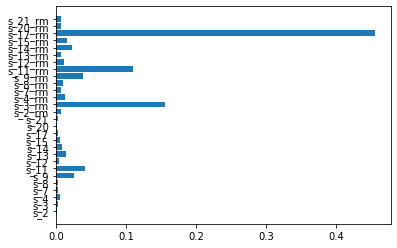

In [68]:
#BEST FEATURE FOR XGB MODEL
xgb.fit(X_train_tm_s, y_train_tm)
plt.barh(train_tm.columns, xgb.feature_importances_)

<BarContainer object of 28 artists>

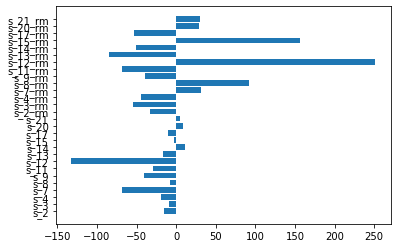

In [69]:
#BEST FEATURE FOR LINEAR REGRESSION MODEL

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=X_train_tm_s, y=y_train_tm)
plt.barh(X_train_tm.columns, model.coef_)

<BarContainer object of 28 artists>

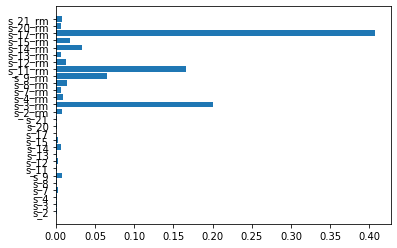

In [70]:
#BEST FEATURE FOR RF MODEL
rf.fit(X_train_tm_s, y_train_tm)
plt.barh(train_tm.columns, rf.feature_importances_)

In [71]:
dftm= pd.concat([train['unit_number'],train_tm,train['RUL']],axis=1)

In [72]:
dftm

,unit_number,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,...,s_9_rm,s_11_rm,s_12_rm,s_13_rm,s_14_rm,s_15_rm,s_17_rm,s_20_rm,s_21_rm,RUL
0,1,642.36,1583.23,1396.84,553.97,2387.96,9062.17,47.30,522.31,2388.01,...,9062.170,47.300,522.310,2388.010,8145.320,8.42460,391.0,39.110,23.35370,258
1,1,642.50,1584.69,1396.89,554.55,2388.00,9061.78,47.23,522.42,2388.03,...,9061.780,47.230,522.420,2388.030,8152.850,8.44030,392.0,38.990,23.44910,257
2,1,642.18,1582.35,1405.61,554.43,2388.03,9070.23,47.22,522.03,2388.00,...,9070.230,47.220,522.030,2388.000,8150.170,8.39010,391.0,38.850,23.36690,256
3,1,642.92,1585.61,1392.27,555.21,2388.00,9064.57,47.24,522.49,2388.08,...,9064.570,47.240,522.490,2388.080,8146.560,8.38780,392.0,38.960,23.29510,255
4,1,641.68,1588.63,1397.65,554.74,2388.04,9076.14,47.15,522.58,2388.03,...,9076.140,47.150,522.580,2388.030,8147.800,8.38690,392.0,39.140,23.45830,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,643.78,1596.01,1424.11,551.86,2388.25,9070.82,48.27,519.66,2388.30,...,9064.163,48.131,519.979,2388.233,8138.135,8.50605,395.7,38.515,23.11986,4
24716,100,643.29,1596.38,1429.14,551.86,2388.23,9064.60,48.13,519.91,2388.28,...,9064.129,48.166,520.010,2388.241,8138.611,8.50967,395.5,38.512,23.11430,3
24717,100,643.84,1604.53,1431.41,551.30,2388.25,9063.45,48.18,519.44,2388.24,...,9063.777,48.163,519.910,2388.238,8139.003,8.50969,395.6,38.496,23.09431,2
24718,100,643.94,1597.56,1426.57,550.69,2388.26,9062.22,48.05,520.01,2388.26,...,9063.643,48.157,519.880,2388.243,8139.267,8.51398,395.6,38.476,23.09942,1


In [73]:
def plot_signal(df, signal_name):
    plt.figure(figsize=(13,5))
    for i in df['unit_number'].unique():
        if (i % 10 == 0):  
            plt.plot('RUL', signal_name, data=df[df['unit_number']==i].rolling(8).mean())

    plt.ylabel(signal_name)
    plt.xlabel('Remaining Useful Life')
    plt.show()

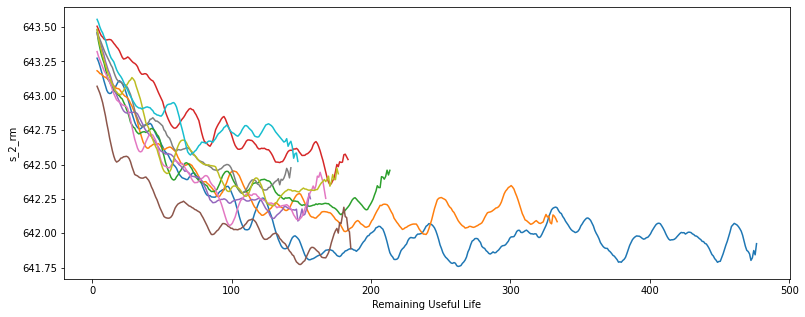

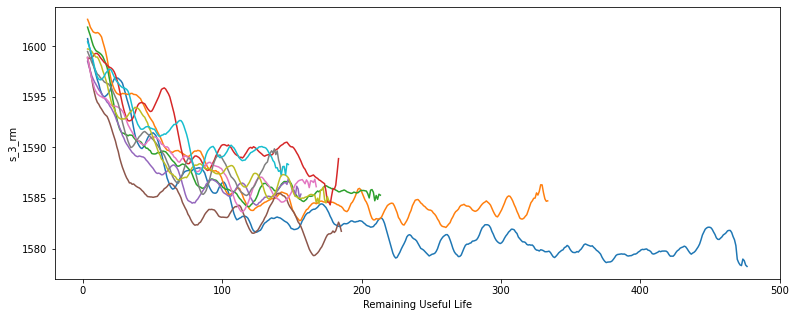

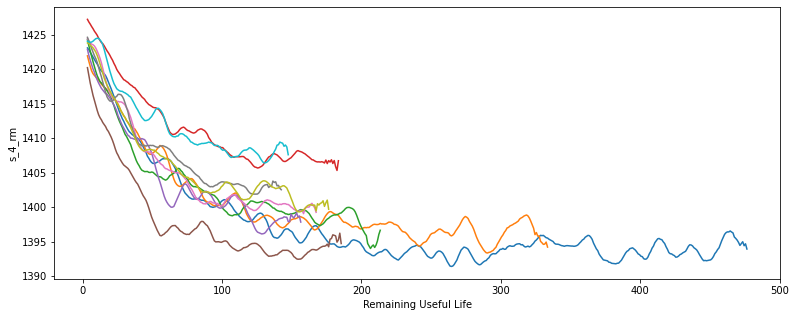

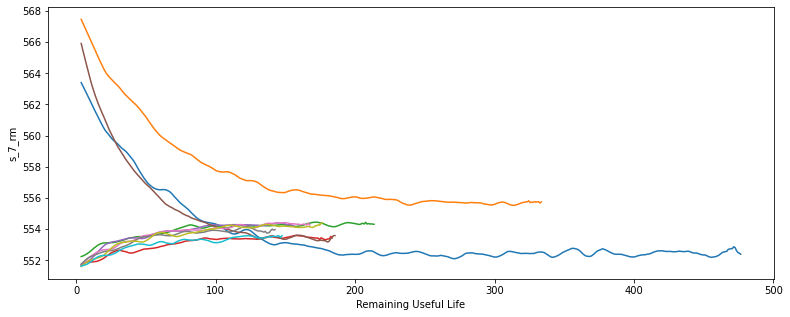

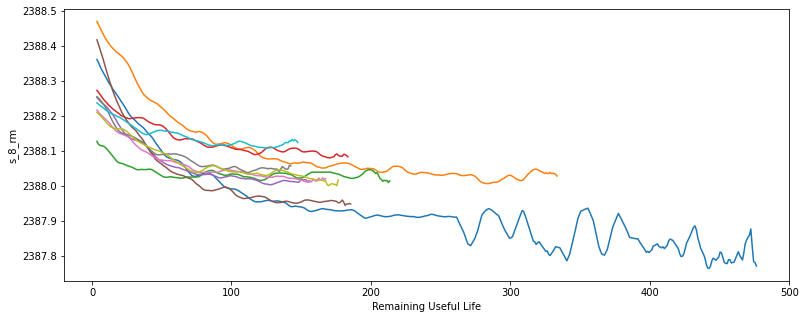

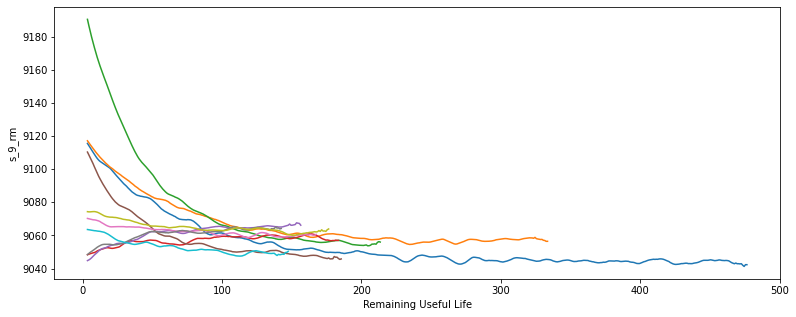

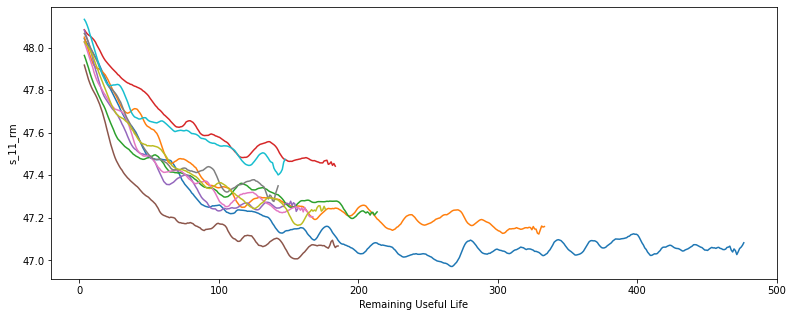

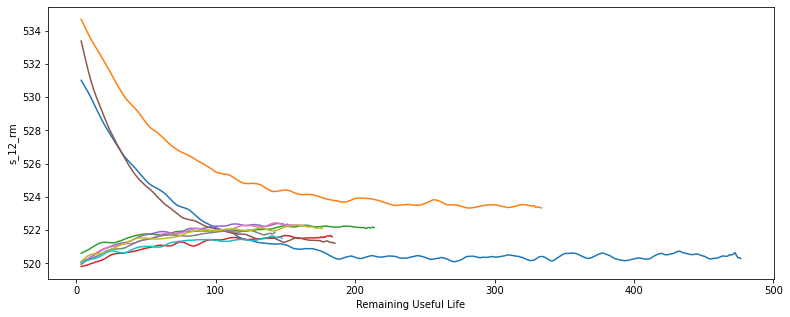

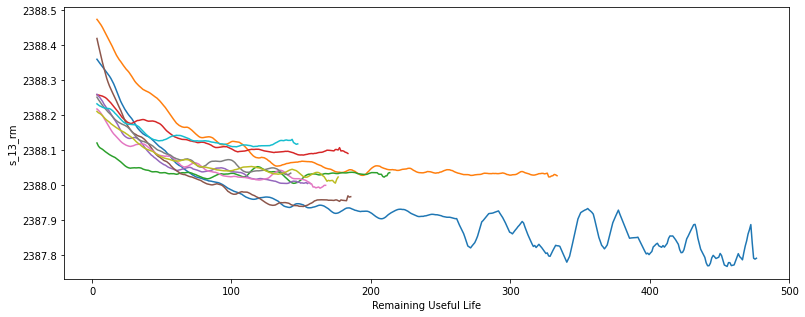

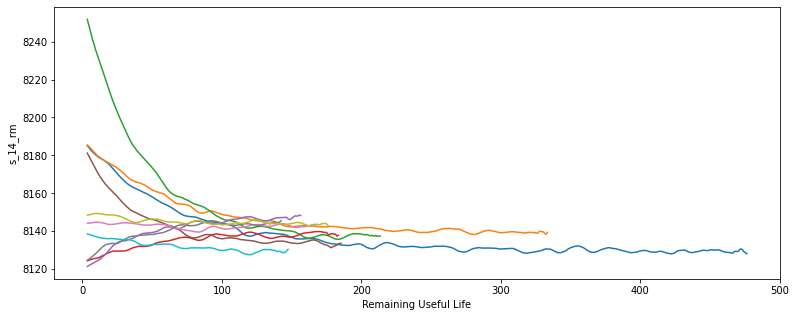

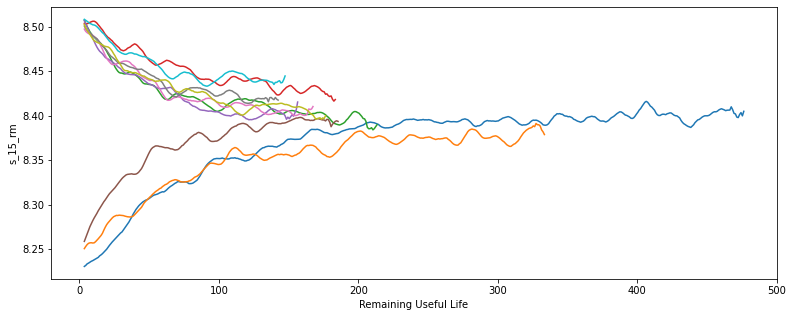

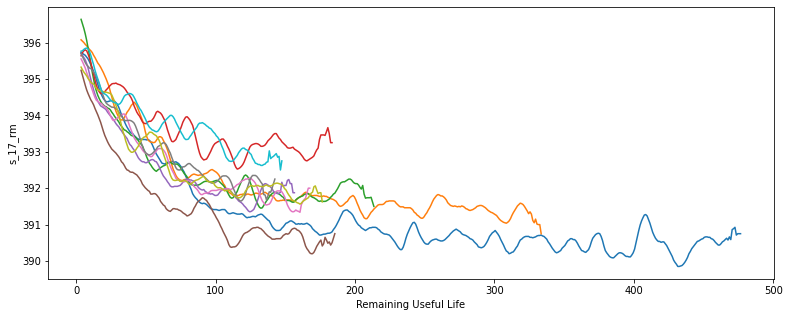

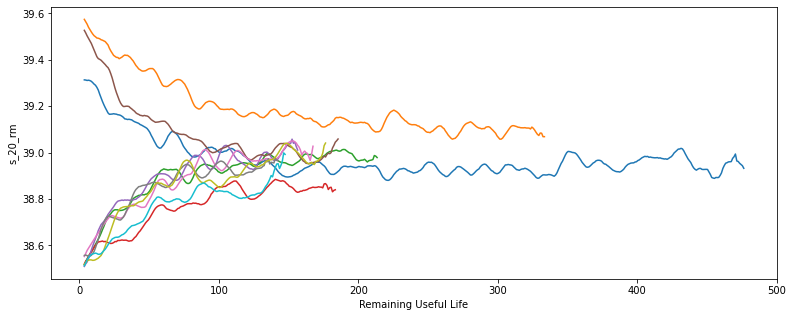

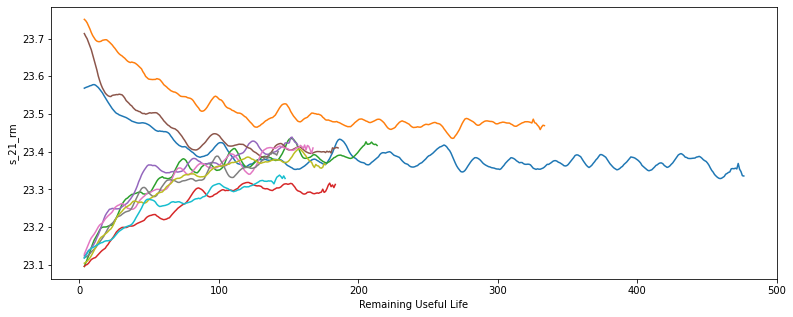

In [74]:
for i in range(1,22):
     if i not in [1,5,6,10,16,18,19] :
        try:
            plot_signal(dftm, 's_'+str(i)+'_rm')
        except:
            pass

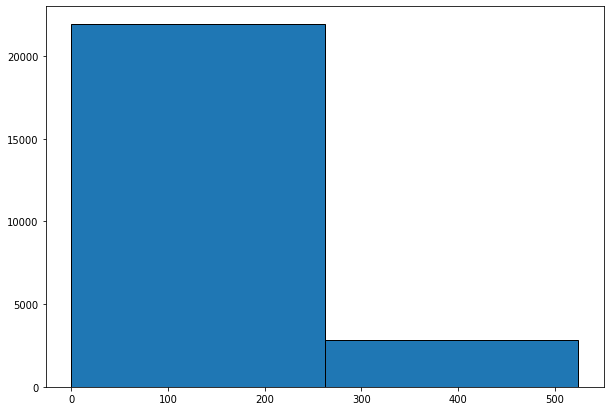

(array([21919.,  2801.]), array([  0., 262., 524.]), <BarContainer object of 2 artists>)


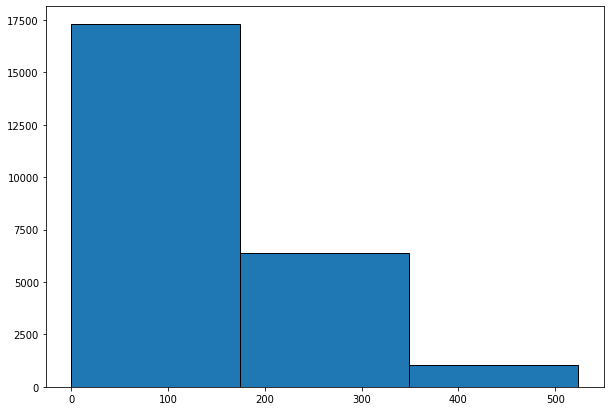

(array([17287.,  6405.,  1028.]), array([  0.        , 174.66666667, 349.33333333, 524.        ]), <BarContainer object of 3 artists>)


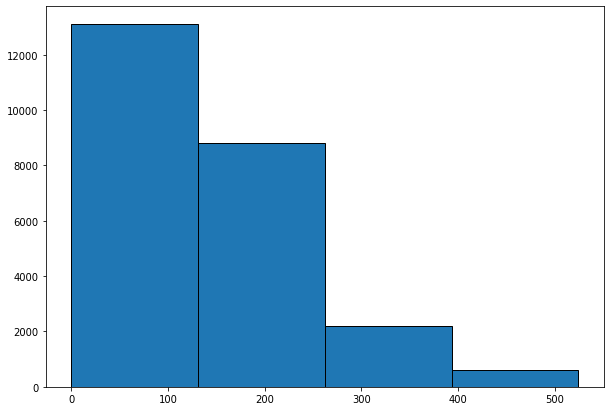

(array([13100.,  8819.,  2202.,   599.]), array([  0., 131., 262., 393., 524.]), <BarContainer object of 4 artists>)


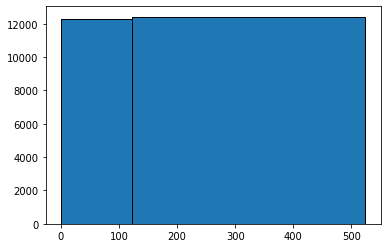

[  0. 123. 524.]


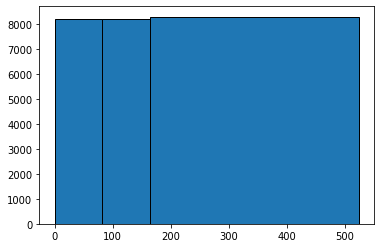

[  0.  82. 165. 524.]


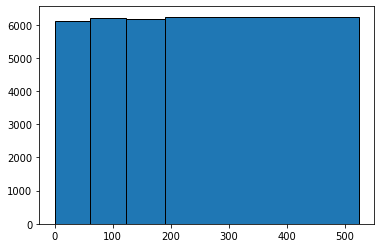

[  0.  61. 123. 190. 524.]


In [75]:
#-- fixing bins width -----
# Creating histogram of 2 bins(same width)
fig, ax = plt.subplots(figsize =(10, 7))
m=ax.hist(list(train['RUL']), bins = 2, edgecolor='black')
# Show plot
plt.show()
print(m)

# Creating histogram of 3 bins(same width)
fig, ax = plt.subplots(figsize =(10, 7))
m=ax.hist(list(train['RUL']), bins = 3, edgecolor='black')
# Show plot
plt.show()
print(m)

# Creating histogram of 4 bins(same width)
fig, ax = plt.subplots(figsize =(10, 7))
m=ax.hist(list(train['RUL']), bins = 4, edgecolor='black')
# Show plot
plt.show()
print(m)



#-- fixing bins height -----

l=len(list(train['RUL']))
k=l/4

#define function to calculate equal-frequency bins, bins=2
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins 
n, bins, patches = plt.hist(list(train['RUL']), equalObs(list(train['RUL']), 2), edgecolor='black')
plt.show()
print(bins)

#define function to calculate equal-frequency bins, bins=3
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins 
n, bins, patches = plt.hist(list(train['RUL']), equalObs(list(train['RUL']), 3), edgecolor='black')
plt.show()
print(bins)


#define function to calculate equal-frequency bins, bins=4
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins 
n, bins, patches = plt.hist(list(train['RUL']), equalObs(list(train['RUL']), 4), edgecolor='black')
plt.show()
print(bins)


In [76]:
y_train_tm

6740      67
182       76
20262    148
11658    153
15980    148
        ... 
21575     21
5390     195
860      145
15795    102
23654    186
Name: RUL, Length: 16068, dtype: int64

In [77]:
label_map={1:"RISK ZONE",2:"MODERATED RISK",3:"NO RISK"}

y=[]

#--Transforming rul values to classes :
for k in dftm['RUL']:
    if k<=68:
        y.append(1)
    elif k>69 and k<=137:
        y.append(2)
    else:
        y.append(3)
X_train_tm_c, X_test_tm_c, y_train_tm_c, y_test_tm_c=train_test_split(dftm.drop(columns=['unit_number','RUL']),np.array(y), test_size=0.35, stratify=np.array(y))
X_train_tm_cs=scaler.fit_transform(X_train_tm_c)
X_test_tm_cs=scaler.fit_transform(X_test_tm_c)

In [78]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true)))

In [79]:
# Fit du  Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state = 1)

In [80]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [81]:
y_valid_c=[]
for k in y_valid['RUL']:
    if k<=68:
        y_valid_c.append(1)
    elif k>69 and k<=137:
        y_valid_c.append(2)
    else:
        y_valid_c.append(3)
        
y_valid_c=np.array(y_valid_c)

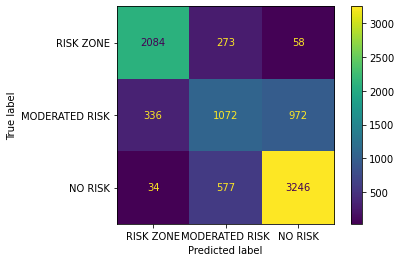

SVM
Accuracy score of training 0.744
Error rate of training 0.149
Accuracy score of test 0.740
Error rate of test 0.145
              precision    recall  f1-score   support

           1       0.85      0.86      0.86      2415
           2       0.56      0.45      0.50      2380
           3       0.76      0.84      0.80      3857

    accuracy                           0.74      8652
   macro avg       0.72      0.72      0.72      8652
weighted avg       0.73      0.74      0.73      8652



In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

classifier.fit(X_train_tm_cs,np.array(y_train_tm_c))
y_svc_train=classifier.predict(X_train_tm_cs)

y_svc_test=classifier.predict(X_test_tm_cs)


cm= confusion_matrix(y_test_tm_c, y_svc_test, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[classifier.classes_[0]],label_map[classifier.classes_[1]],label_map[classifier.classes_[2]]])
disp.plot()
plt.show()

# Measure the performance
print('SVM')
print("Accuracy score of training %.3f" %metrics.accuracy_score(y_train_tm_c, y_svc_train))
print("Error rate of training %.3f" %mean_absolute_percentage_error(y_train_tm_c,y_svc_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test_tm_c, y_svc_test))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test_tm_c,y_svc_test))
print(metrics.classification_report(y_test_tm_c,y_svc_test))

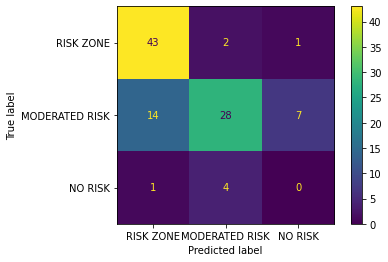

SVM
Accuracy score of validation 0.710
Error rate of validation 0.165


In [83]:
y_svc_valid=classifier.predict(X_valid_s)
cm= confusion_matrix(y_valid_c, y_svc_valid, labels=classifier.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[classifier.classes_[0]],label_map[classifier.classes_[1]],label_map[classifier.classes_[2]]])
disp.plot()
plt.show()
print('SVM')
print("Accuracy score of validation %.3f" %metrics.accuracy_score(y_valid_c,  y_svc_valid))
print("Error rate of validation %.3f" %mean_absolute_percentage_error(y_valid_c, y_svc_valid))

In [84]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=5)

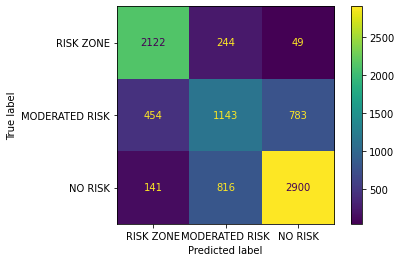

Random Forest Classifier
Accuracy score of test 0.976
Error rate of test 0.014
Accuracy score of test 0.713
Error rate of test 0.153
              precision    recall  f1-score   support

           1       0.78      0.88      0.83      2415
           2       0.52      0.48      0.50      2380
           3       0.78      0.75      0.76      3857

    accuracy                           0.71      8652
   macro avg       0.69      0.70      0.70      8652
weighted avg       0.71      0.71      0.71      8652



In [85]:
clf.fit(X_train_tm_cs,np.array(y_train_tm_c))
y_rfc_train=clf.predict(X_train_tm_cs)
y_rfc_test=clf.predict(X_test_tm_cs)
cm= confusion_matrix(y_test_tm_c, y_rfc_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[clf.classes_[0]],label_map[clf.classes_[1]],label_map[clf.classes_[2]]])
disp.plot()
plt.show()

# Measure the performance
print('Random Forest Classifier')
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_train_tm_c, y_rfc_train))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_train_tm_c,y_rfc_train))

print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test_tm_c, y_rfc_test))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test_tm_c,y_rfc_test))

print(metrics.classification_report(y_test_tm_c,y_rfc_test))

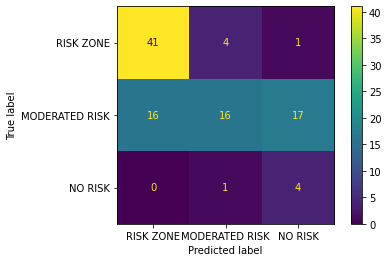

Random Forest Classifier
Accuracy score of validation 0.610
Error rate of validation 0.228
              precision    recall  f1-score   support

           1       0.72      0.89      0.80        46
           2       0.76      0.33      0.46        49
           3       0.18      0.80      0.30         5

    accuracy                           0.61       100
   macro avg       0.55      0.67      0.52       100
weighted avg       0.71      0.61      0.61       100



In [86]:
y_rfc_valid=clf.predict(X_valid_s)
cm= confusion_matrix(y_valid_c, y_rfc_valid, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[clf.classes_[0]],label_map[clf.classes_[1]],label_map[clf.classes_[2]]])
disp.plot()
plt.show()
print('Random Forest Classifier')
print("Accuracy score of validation %.3f" %metrics.accuracy_score(y_valid_c, y_rfc_valid))
print("Error rate of validation %.3f" %mean_absolute_percentage_error(y_valid_c,y_rfc_valid))
print(metrics.classification_report(y_valid_c,y_rfc_valid))

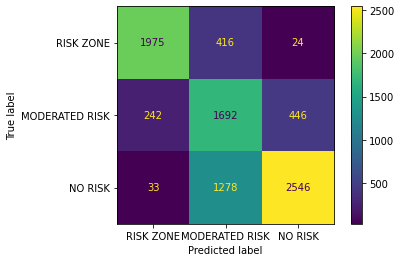

Guassian Naive Bayes
Accuracy score of train 0.714
Error rate of train 0.152
Accuracy score of test 0.718
Error rate of test 0.145
              precision    recall  f1-score   support

           1       0.88      0.82      0.85      2415
           2       0.50      0.71      0.59      2380
           3       0.84      0.66      0.74      3857

    accuracy                           0.72      8652
   macro avg       0.74      0.73      0.72      8652
weighted avg       0.76      0.72      0.73      8652



In [87]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_tm_cs,np.array(y_train_tm_c))

y_gnb_test= gnb.predict(X_test_tm_cs)
y_gnb_train= gnb.predict(X_train_tm_cs)


cm= confusion_matrix(y_test_tm_c, y_gnb_test, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[gnb.classes_[0]],label_map[gnb.classes_[1]],label_map[gnb.classes_[2]]])
disp.plot()
plt.show()

# Measure the performance
print('Guassian Naive Bayes')
print("Accuracy score of train %.3f" %metrics.accuracy_score(y_train_tm_c, y_gnb_train))
print("Error rate of train %.3f" %mean_absolute_percentage_error(y_train_tm_c,y_gnb_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test_tm_c, y_gnb_test))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test_tm_c,y_gnb_test))

print(metrics.classification_report(y_test_tm_c,y_gnb_test))

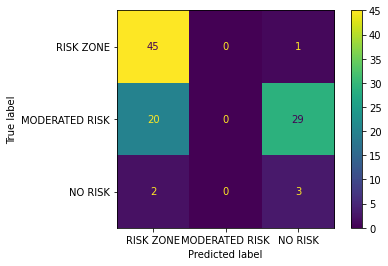

Random Forest Classifier
Accuracy score of validation 0.480
Error rate of validation 0.278
              precision    recall  f1-score   support

           1       0.67      0.98      0.80        46
           2       0.00      0.00      0.00        49
           3       0.09      0.60      0.16         5

    accuracy                           0.48       100
   macro avg       0.25      0.53      0.32       100
weighted avg       0.31      0.48      0.37       100



In [88]:
y_gnb_valid=gnb.predict(X_valid_s)
cm= confusion_matrix(y_valid_c, y_gnb_valid, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[gnb.classes_[0]],label_map[gnb.classes_[1]],label_map[gnb.classes_[2]]])
disp.plot()
plt.show()
print('Random Forest Classifier')
print("Accuracy score of validation %.3f" %metrics.accuracy_score(y_valid_c, y_gnb_valid))
print("Error rate of validation %.3f" %mean_absolute_percentage_error(y_valid_c,y_gnb_valid))
print(metrics.classification_report(y_valid_c,y_gnb_valid))

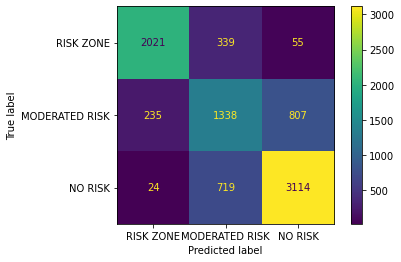

KNN
Accuracy score of train 0.756
Error rate of train 0.144
Accuracy score of test 0.748
Error rate of test 0.142
              precision    recall  f1-score   support

           1       0.89      0.84      0.86      2415
           2       0.56      0.56      0.56      2380
           3       0.78      0.81      0.80      3857

    accuracy                           0.75      8652
   macro avg       0.74      0.74      0.74      8652
weighted avg       0.75      0.75      0.75      8652



In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train_tm_cs,np.array(y_train_tm_c))

y_knn_test= knn.predict(X_test_tm_cs)
y_knn_train= knn.predict(X_train_tm_cs)

cm= confusion_matrix(y_test_tm_c, y_knn_test, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[knn.classes_[0]],label_map[knn.classes_[1]],label_map[knn.classes_[2]]])
disp.plot()
plt.show()

# Measure the performance
print('KNN')
print("Accuracy score of train %.3f" %metrics.accuracy_score(y_train_tm_c, y_knn_train))
print("Error rate of train %.3f" %mean_absolute_percentage_error(y_train_tm_c,y_knn_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test_tm_c, y_knn_test))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test_tm_c,y_knn_test))

print(metrics.classification_report(y_test_tm_c,y_knn_test))


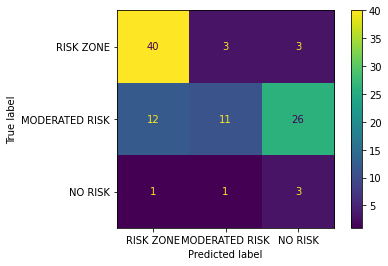

KNN
Accuracy score of validation 0.540
Error rate of validation 0.290
              precision    recall  f1-score   support

           1       0.75      0.87      0.81        46
           2       0.73      0.22      0.34        49
           3       0.09      0.60      0.16         5

    accuracy                           0.54       100
   macro avg       0.53      0.56      0.44       100
weighted avg       0.71      0.54      0.55       100



In [90]:
y_knn_valid=knn.predict(X_valid_s)
cm= confusion_matrix(y_valid_c, y_knn_valid, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[knn.classes_[0]],label_map[knn.classes_[1]],label_map[knn.classes_[2]]])
disp.plot()
plt.show()
print('KNN')
print("Accuracy score of validation %.3f" %metrics.accuracy_score(y_valid_c, y_knn_valid))
print("Error rate of validation %.3f" %mean_absolute_percentage_error(y_valid_c,y_knn_valid))
print(metrics.classification_report(y_valid_c,y_knn_valid))

In [91]:
def transform_to_classes(d):
    y=[]
    for k in d:
        if k<=68:
            y.append(1)
        elif k>69 and k<=137:
            y.append(2)
        else:
            y.append(3)
    return y

Index du train :  [    0     1     2 ... 24716 24717 24719] 

Index de test :  [    5     6     8 ... 24711 24714 24718]


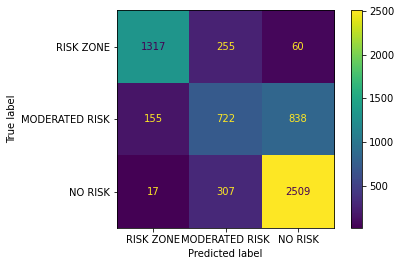

SVM
Accuracy score of training 0.746
Error rate of training 0.146
Accuracy score of test 0.736
Error rate of test 0.159
              precision    recall  f1-score   support

           1       0.88      0.81      0.84      1632
           2       0.56      0.42      0.48      1715
           3       0.74      0.89      0.80      2833

    accuracy                           0.74      6180
   macro avg       0.73      0.70      0.71      6180
weighted avg       0.73      0.74      0.73      6180

Index du train :  [    1     2     3 ... 24717 24718 24719] 

Index de test :  [    0    11    17 ... 24707 24709 24712]


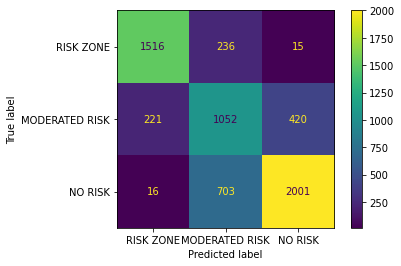

SVM
Accuracy score of training 0.744
Error rate of training 0.149
Accuracy score of test 0.739
Error rate of test 0.135
              precision    recall  f1-score   support

           1       0.86      0.86      0.86      1767
           2       0.53      0.62      0.57      1693
           3       0.82      0.74      0.78      2720

    accuracy                           0.74      6180
   macro avg       0.74      0.74      0.74      6180
weighted avg       0.75      0.74      0.74      6180

Index du train :  [    0     2     3 ... 24714 24716 24718] 

Index de test :  [    1    12    13 ... 24715 24717 24719]


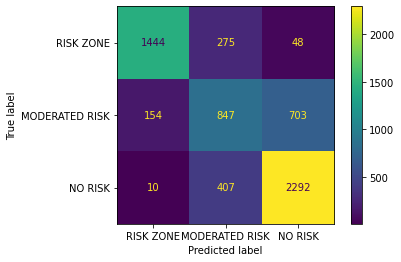

SVM
Accuracy score of training 0.744
Error rate of training 0.148
Accuracy score of test 0.742
Error rate of test 0.152
              precision    recall  f1-score   support

           1       0.90      0.82      0.86      1767
           2       0.55      0.50      0.52      1704
           3       0.75      0.85      0.80      2709

    accuracy                           0.74      6180
   macro avg       0.74      0.72      0.73      6180
weighted avg       0.74      0.74      0.74      6180

Index du train :  [    0     1     5 ... 24717 24718 24719] 

Index de test :  [    2     3     4 ... 24697 24708 24716]


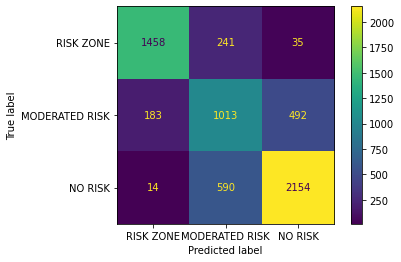

SVM
Accuracy score of training 0.746
Error rate of training 0.147
Accuracy score of test 0.748
Error rate of test 0.138
              precision    recall  f1-score   support

           1       0.88      0.84      0.86      1734
           2       0.55      0.60      0.57      1688
           3       0.80      0.78      0.79      2758

    accuracy                           0.75      6180
   macro avg       0.74      0.74      0.74      6180
weighted avg       0.76      0.75      0.75      6180



In [ ]:
from sklearn.model_selection import KFold
train_tm_cv=dftm.drop(columns=['unit_number','RUL']).copy()
y=dftm['RUL']
cv = KFold(n_splits=4, shuffle=True)
for train_index, test_index in cv.split(train_tm) :
    X_train, X_test, y_train, y_test = train_tm_cv.iloc[train_index,:], train_tm_cv.iloc[test_index,:],np.array(transform_to_classes(y[train_index])), np.array(transform_to_classes(y[test_index]))
    classifier.fit(scaler.fit_transform(X_train), y_train)
    y_svc_train=classifier.predict(scaler.fit_transform(X_train))

    y_svc_test=classifier.predict(scaler.fit_transform(X_test))


    cm= confusion_matrix(y_test, y_svc_test, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[classifier.classes_[0]],label_map[classifier.classes_[1]],label_map[classifier.classes_[2]]])
    disp.plot()
    plt.show()

    # Measure the performance
    print('SVM')
    print("Accuracy score of training %.3f" %metrics.accuracy_score(y_train, y_svc_train))
    print("Error rate of training %.3f" %mean_absolute_percentage_error(y_train,y_svc_train))
    print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test, y_svc_test))
    print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test,y_svc_test))
    print(metrics.classification_report(y_test,y_svc_test))